In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# path = "/Users/pierre/Pictures/biology/Blob-Measuring/Level-Measurement-Experiment/stream-captures/main-test-set-25-July-2022T13:23:41/all_values.csv"
# frame = pd.read_csv(path)
# path2 = "/Users/pierre/Pictures/biology/Blob-Measuring/Level-Measurement-Experiment/stream-captures/main-test-set-25-July-2022T13:23:41/perimeter_buffer.csv"
# frame2 = pd.read_csv(path2).iloc[::5, :]

# path = "/Users/pierre/Pictures/biology/Blob-Measuring/Level-Measurement-Experiment/stream-captures/10-August-2022T13:24:19/all_values.csv"
# frame =  pd.read_csv(path)

path="/Users/pierre/Pictures/biology/Blob-Measuring/Level-Measurement-Experiment/stream-captures/19-August-2022T19:36:26-swirl-A1-2-100s/all_values.csv"
frame =  pd.read_csv(path)

path2="/Users/pierre/Pictures/biology/Blob-Measuring/Level-Measurement-Experiment/stream-captures/19-August-2022T19:04:48-swirl-D6-1/all_values.csv"
frame2 = pd.read_csv(path2)

path3="/Users/pierre/Pictures/biology/Blob-Measuring/Level-Measurement-Experiment/stream-captures/19-August-2022T19:16:21-swirl-D6-2/all_values.csv"
frame3 =  pd.read_csv(path3)

path4= "/Users/pierre/Pictures/biology/Blob-Measuring/Level-Measurement-Experiment/stream-captures/19-August-2022T19:25:43-swirl-A1-1/all_values.csv"
frame4 =  pd.read_csv(path4)




# path5="/Users/pierre/Pictures/biology/Blob-Measuring/Level-Measurement-Experiment/stream-captures/16-August-2022T19:02:56-comparison-D1-3/all_values.csv"
# frame5 =  pd.read_csv(path5)

# path6="/Users/pierre/Pictures/biology/Blob-Measuring/Level-Measurement-Experiment/stream-captures/17-August-2022T12:30:04-comparison-D6/all_values.csv"
# frame6 =  pd.read_csv(path6)


In [112]:
df = pd.DataFrame({"volume":frame.columns,
                   "mean": frame.mean().to_frame()[0].values,
                   "std": frame.std().to_frame()[0].values,
                   "var": frame.var().to_frame()[0].values,
                    })

In [46]:
frame.mean().to_frame()[0].values

array([  49.5       , 1056.13768375, 1117.66452128, 1146.83092619,
       1192.71525222, 1176.24627337, 1271.06907276, 1267.1332071 ,
       1312.66472581, 1310.90583305, 1264.96043287, 1319.56669428,
       1339.82149445, 1360.57293827, 1356.1433148 , 1375.7345839 ,
       1344.15132336, 1351.73957495, 1372.52629125, 1362.48470325,
       1381.84383606, 1387.41576943, 1429.47937283, 1430.74172696,
       1421.51489587, 1422.17213811, 1419.63186357, 1500.76957293,
       2048.34894609])

In [79]:
frame2["547.5650849233924"]

0      547.047840
5      557.650854
10     571.936868
15     575.258995
20     576.196888
25     579.833295
30     583.695073
35     589.579816
40     594.213110
45     598.628910
50     601.850152
55     603.961943
60     610.581614
65     615.857650
70     620.531617
75     623.723644
80     625.339698
85     634.218257
90     637.983914
95     646.038221
100    649.962878
105    655.785569
110    658.351957
115    666.229133
120    668.325175
125    674.599221
130    679.496407
135    684.814953
140    695.228678
145    700.444299
150    711.558123
155    689.688509
160    689.688509
Name: 547.5650849233924, dtype: float64

In [12]:
frame.var = pow(frame.perimeter_pb_stdev,2)

In [105]:
frame.iloc[[1,5,10]]

,Unnamed: 0,volume,perimeter,perimeter_pb_mean,perimeter_pb_stdev,contour_area,contour_area_pb_mean,contour_area_pb_stdev
1,1,0.5,557.968162,558.266364,0.503143,6125.5,6125.842,4.294190
5,5,0.9,577.467661,579.497872,0.666895,6571.0,6598.218,14.021495
10,10,1.4,601.447932,602.054850,0.576808,7111.0,7125.042,11.151472


In [15]:
frame.var
# df = df.drop(28)
# df = df.drop(0)
# df= df.drop(1)
# df = df.drop(14)
# df = df.drop(27)

0     0.000257
1     0.004774
2     0.091821
3     8.303540
4     0.236994
5     0.676446
6     1.260012
7     0.088237
8     0.136389
9     0.692293
10    0.381066
11    0.661058
12    0.749843
13    0.299309
14    0.066858
15    0.473739
16    0.129388
17    3.121971
18    0.428960
19    0.414328
20    0.447195
21    0.182429
22    0.001305
23    0.486558
24    0.720547
25    0.039504
26    0.516934
27    0.448758
28    0.195486
29    0.011656
30    0.256455
31    0.074211
32    0.124673
33    0.174853
34    0.051934
Name: perimeter_pb_stdev, dtype: float64

In [77]:
for key, group in df.groupby('volume'):
    #print(key)
    print(group)
# plt.plot(df['volume'], df['mean'], yerr=df['std'])

  volume         mean       std
2     05  1117.664521  0.897171
  volume         mean      std
3     06  1146.830926  1.52688
  volume         mean       std
4     07  1192.715252  1.508089
  volume         mean      std
5     08  1176.246273  1.49215
  volume         mean       std
6     09  1271.069073  1.426365
  volume         mean       std
7     10  1267.133207  1.483079
  volume         mean       std
8     11  1312.664726  4.112507
  volume         mean       std
9     12  1310.905833  2.559582
   volume         mean       std
10     13  1264.960433  6.420307
   volume         mean       std
11     14  1319.566694  3.774448
   volume         mean       std
12     15  1339.821494  3.952147
   volume         mean       std
13     16  1360.572938  2.397663
   volume         mean        std
14     17  1356.143315  18.565659
   volume         mean       std
15     18  1375.734584  5.626147
   volume         mean       std
16     19  1344.151323  2.815481
   volume         mean      

In [107]:
frame.iloc[[6,11,16,21,26]]

,Unnamed: 0,volume,perimeter,perimeter_pb_mean,perimeter_pb_stdev,contour_area,contour_area_pb_mean,contour_area_pb_stdev
6,6,1.0,582.885512,583.695142,0.368987,6691.5,6708.632,8.901493
11,11,1.5,603.749188,604.093468,0.257939,7169.5,7176.130,6.152203
16,16,2.0,625.111200,625.335399,0.492550,7720.0,7724.792,8.609420
21,21,2.5,655.318596,655.615692,0.244709,8457.0,8480.264,17.862926
26,26,3.0,679.211571,679.042897,0.142738,9049.5,9069.856,23.349615


In [ ]:
frame = frame.iloc[[6,11,16,21,26]]

## Compare fits from one dataset to another

   Unnamed: 0  volume   perimeter  perimeter_pb_mean  perimeter_pb_stdev  \
0           1     0.4  655.057138         654.812922            0.122315   
2           3     0.6  658.088255         657.613792            0.061905   

   contour_area  contour_area_pb_mean  contour_area_pb_stdev  
0        8514.5               8508.65               2.390021  
2        8596.0               8584.42               1.994041  
    Unnamed: 0  volume   perimeter  perimeter_pb_mean  perimeter_pb_stdev  \
28          30     3.2  822.296577         822.309740            0.403459   
30          32     3.4  911.099132         912.102865            0.958266   

    contour_area  contour_area_pb_mean  contour_area_pb_stdev  
28       13412.5             13417.595              15.874547  
30       16439.5             16468.595              31.727881  


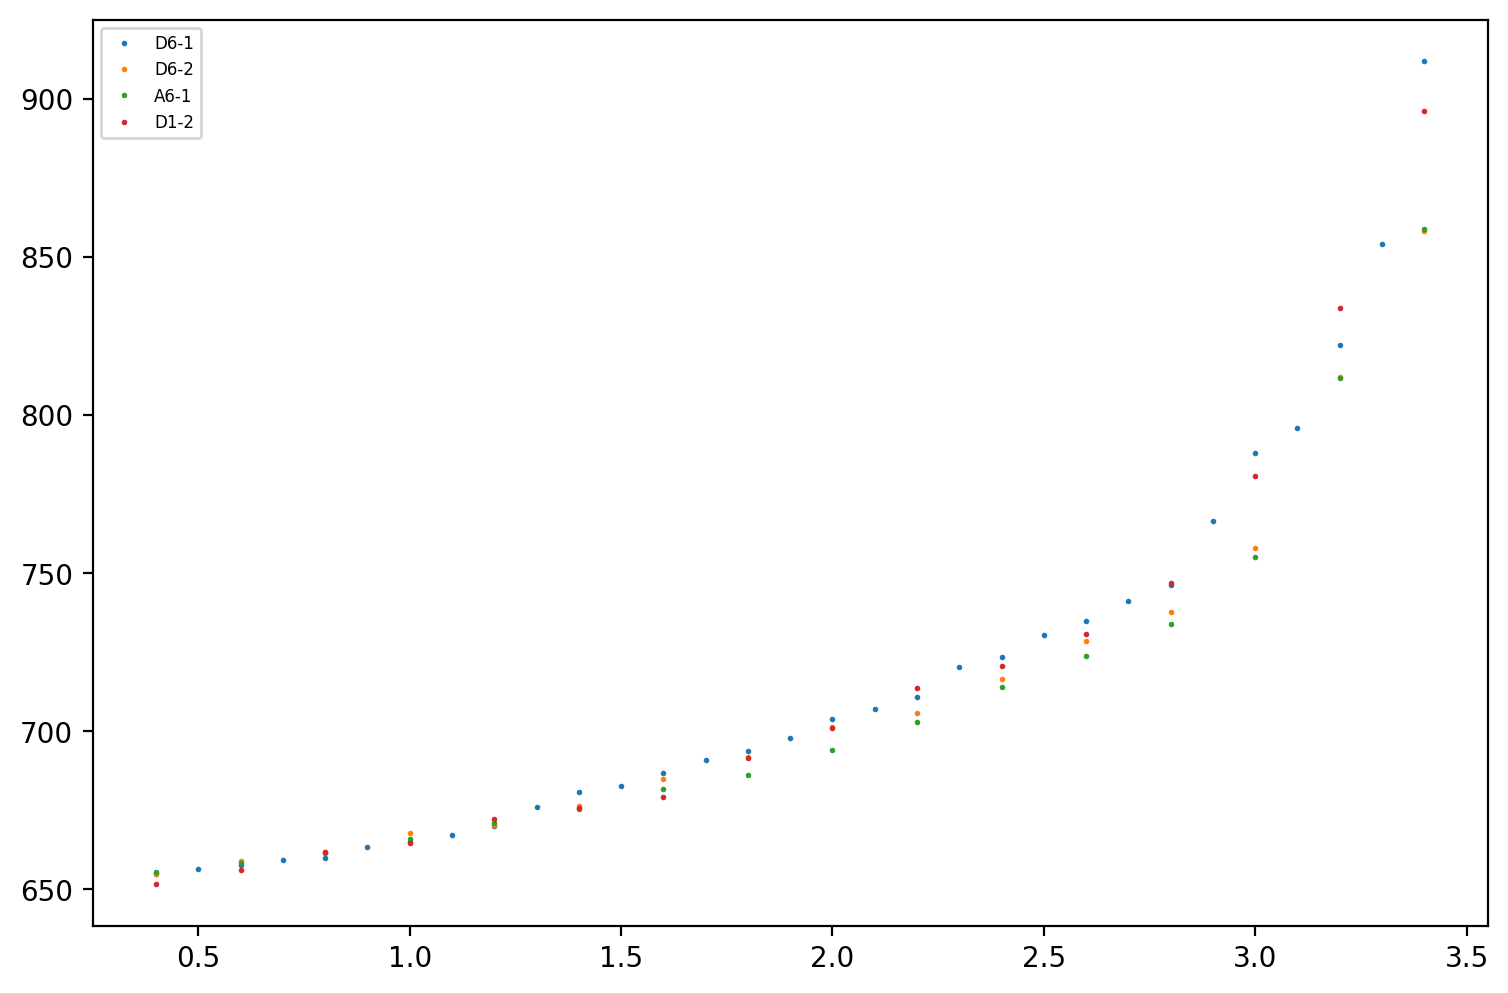

In [39]:
# Compare fits from one dataset to points from another
def get_frame_reset_start_end_index(frame):
    startIndex = 0
    endIndex = len(frame.volume)
    return frame, startIndex, endIndex

plt.rcParams['figure.dpi'] = 200
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.dpi'] = 300

frame = pd.read_csv(path)
frame2 = pd.read_csv(path2)
frame3 = pd.read_csv(path3)

plt.rcParams['figure.dpi'] = 200
fig, ax = plt.subplots(1,1,figsize=(9,6))
subplots = [ax]#[0,0], ax[0,1], ax[1,0], ax[1,1]]

# plt.errorbar(df.volume, df["mean"], yerr=df["var"],fmt="o", marker='s', mfc='red',
#          mec='green')#, ms=20, mew=4)
frame, startIndex, endIndex = get_frame_reset_start_end_index(frame)
frame2, startIndex2, endIndex2 = get_frame_reset_start_end_index(frame2)
frame3, startIndex3, endIndex3 = get_frame_reset_start_end_index(frame3)
frame4, startIndex4, endIndex4 = get_frame_reset_start_end_index(frame4)
# frame5, startIndex5, endIndex5 = get_frame_reset_start_end_index(frame5)
# frame6, startIndex6, endIndex6 = get_frame_reset_start_end_index(frame6)

beginning = frame.iloc[[startIndex,startIndex+2]]
end = frame.iloc[[endIndex-3,endIndex-1]]
print(beginning)
print(end)
# value = "contour_area"
value = "perimeter"
# ax[0,0].errorbar(frame.volume[startIndex:endIndex], frame[value+"_pb_mean"][startIndex:endIndex], yerr=frame[value+"_pb_stdev"][startIndex:endIndex],
#          fmt="o", mfc='red', ms=4, mew=0, label="Measured Points")#, marker='s', mfc='red',
linestyle = "o"
for i in subplots:  
    i.plot(frame.volume[startIndex:endIndex], frame[value+"_pb_mean"][startIndex:endIndex], linestyle,  ms=2, mew=0, label="D6-1")
    i.plot(frame2.volume[startIndex2:endIndex2], frame2[value+"_pb_mean"][startIndex2:endIndex2], linestyle, ms=2, mew=0, label="D6-2")
    i.plot(frame3.volume[startIndex3:endIndex3], frame3[value+"_pb_mean"][startIndex3:endIndex3], linestyle, ms=2, mew=0, label="A6-1")
    i.plot(frame4.volume[startIndex4:endIndex4], frame4[value+"_pb_mean"][startIndex4:endIndex4], linestyle, ms=2, mew=0, label="D1-2")
    # i.plot(frame5.volume[startIndex5:endIndex5], frame5[value+"_pb_mean"][startIndex5:endIndex5], linestyle, ms=2, mew=0, label="D1-3")
    # i.plot(frame6.volume[startIndex6:endIndex6], frame6[value+"_pb_mean"][startIndex6:endIndex6], linestyle, ms=2, mew=0, label="D6")

for i in subplots:
    i.legend(loc='upper left', fontsize=6)

# Main Figures, Curve Comparisons based on fit order and plot of error

frame length:  6
x2 length:  31
x length:  31
x2 length:  31
x2 length:  31
x2 length:  31


/var/folders/5z/d1d_q74d1hd653s14vwq9v800000gn/T/ipykernel_4042/4195179297.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frame, startIndex, endIndex = get_frame_reset_start_end_index(beginning.append(midframe.sample(sample_val-4).sort_values(by=['volume'])).append(end))
/var/folders/5z/d1d_q74d1hd653s14vwq9v800000gn/T/ipykernel_4042/4195179297.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frame, startIndex, endIndex = get_frame_reset_start_end_index(beginning.append(midframe.sample(sample_val-4).sort_values(by=['volume'])).append(end))


Text(0.5, 0.98, 'Evaluating generalizabililty of curve fits')

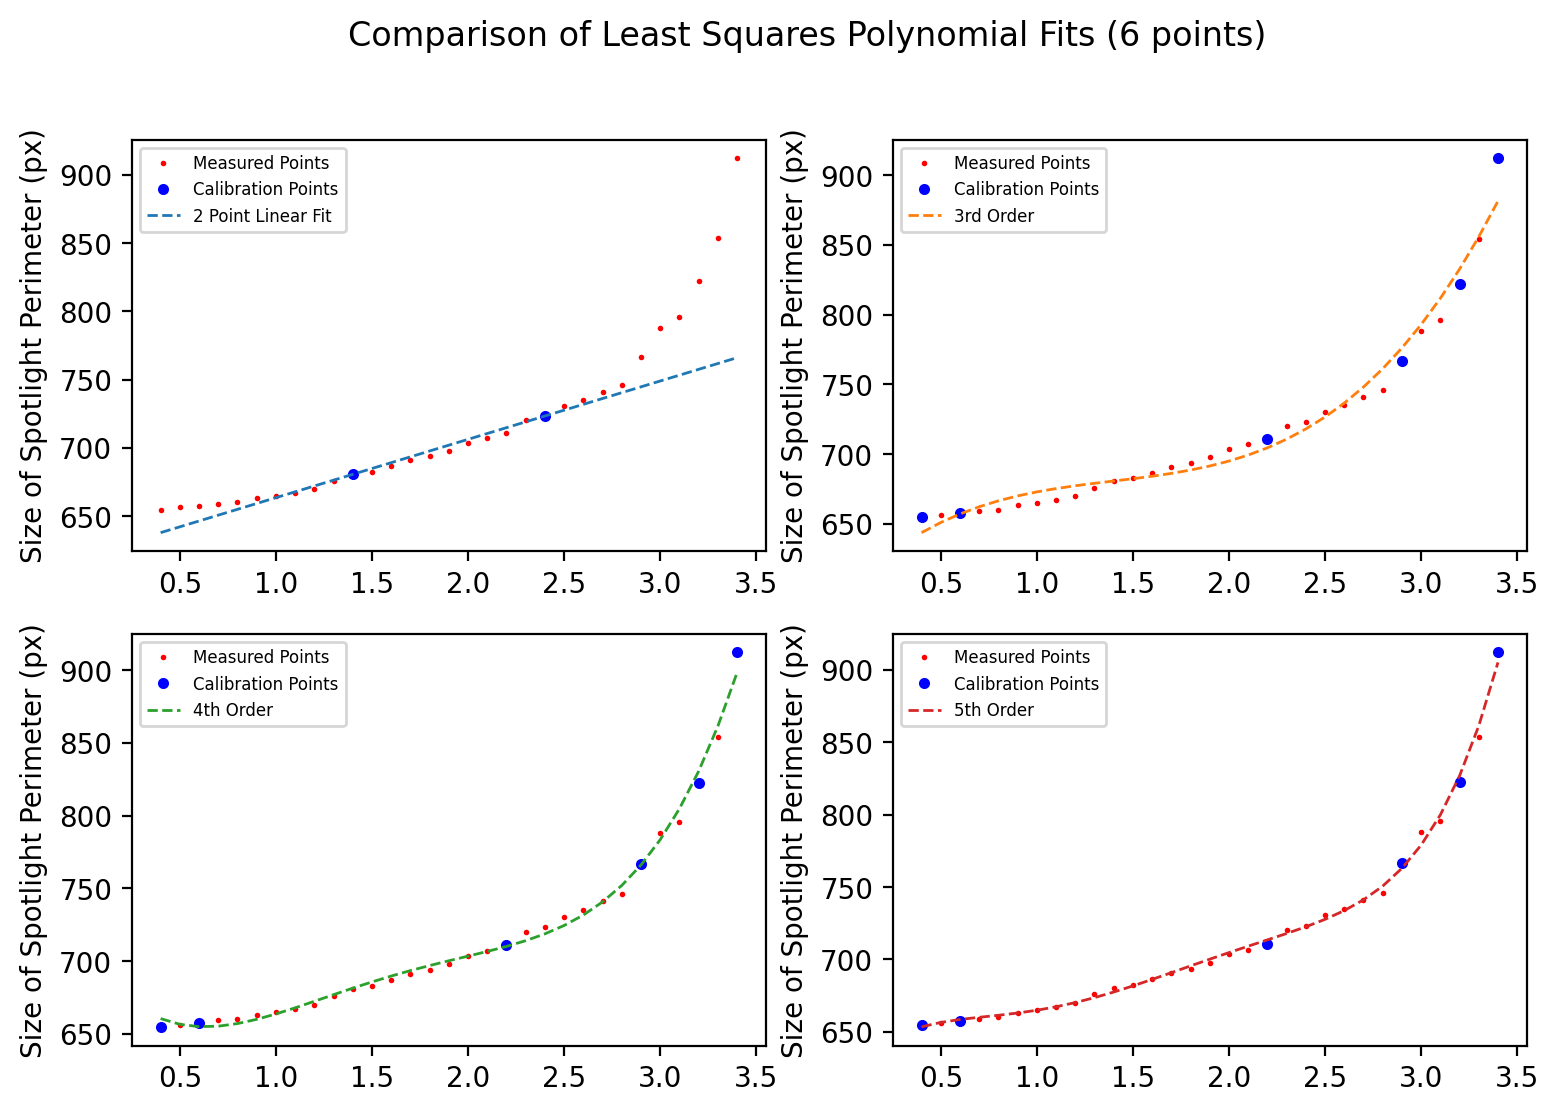

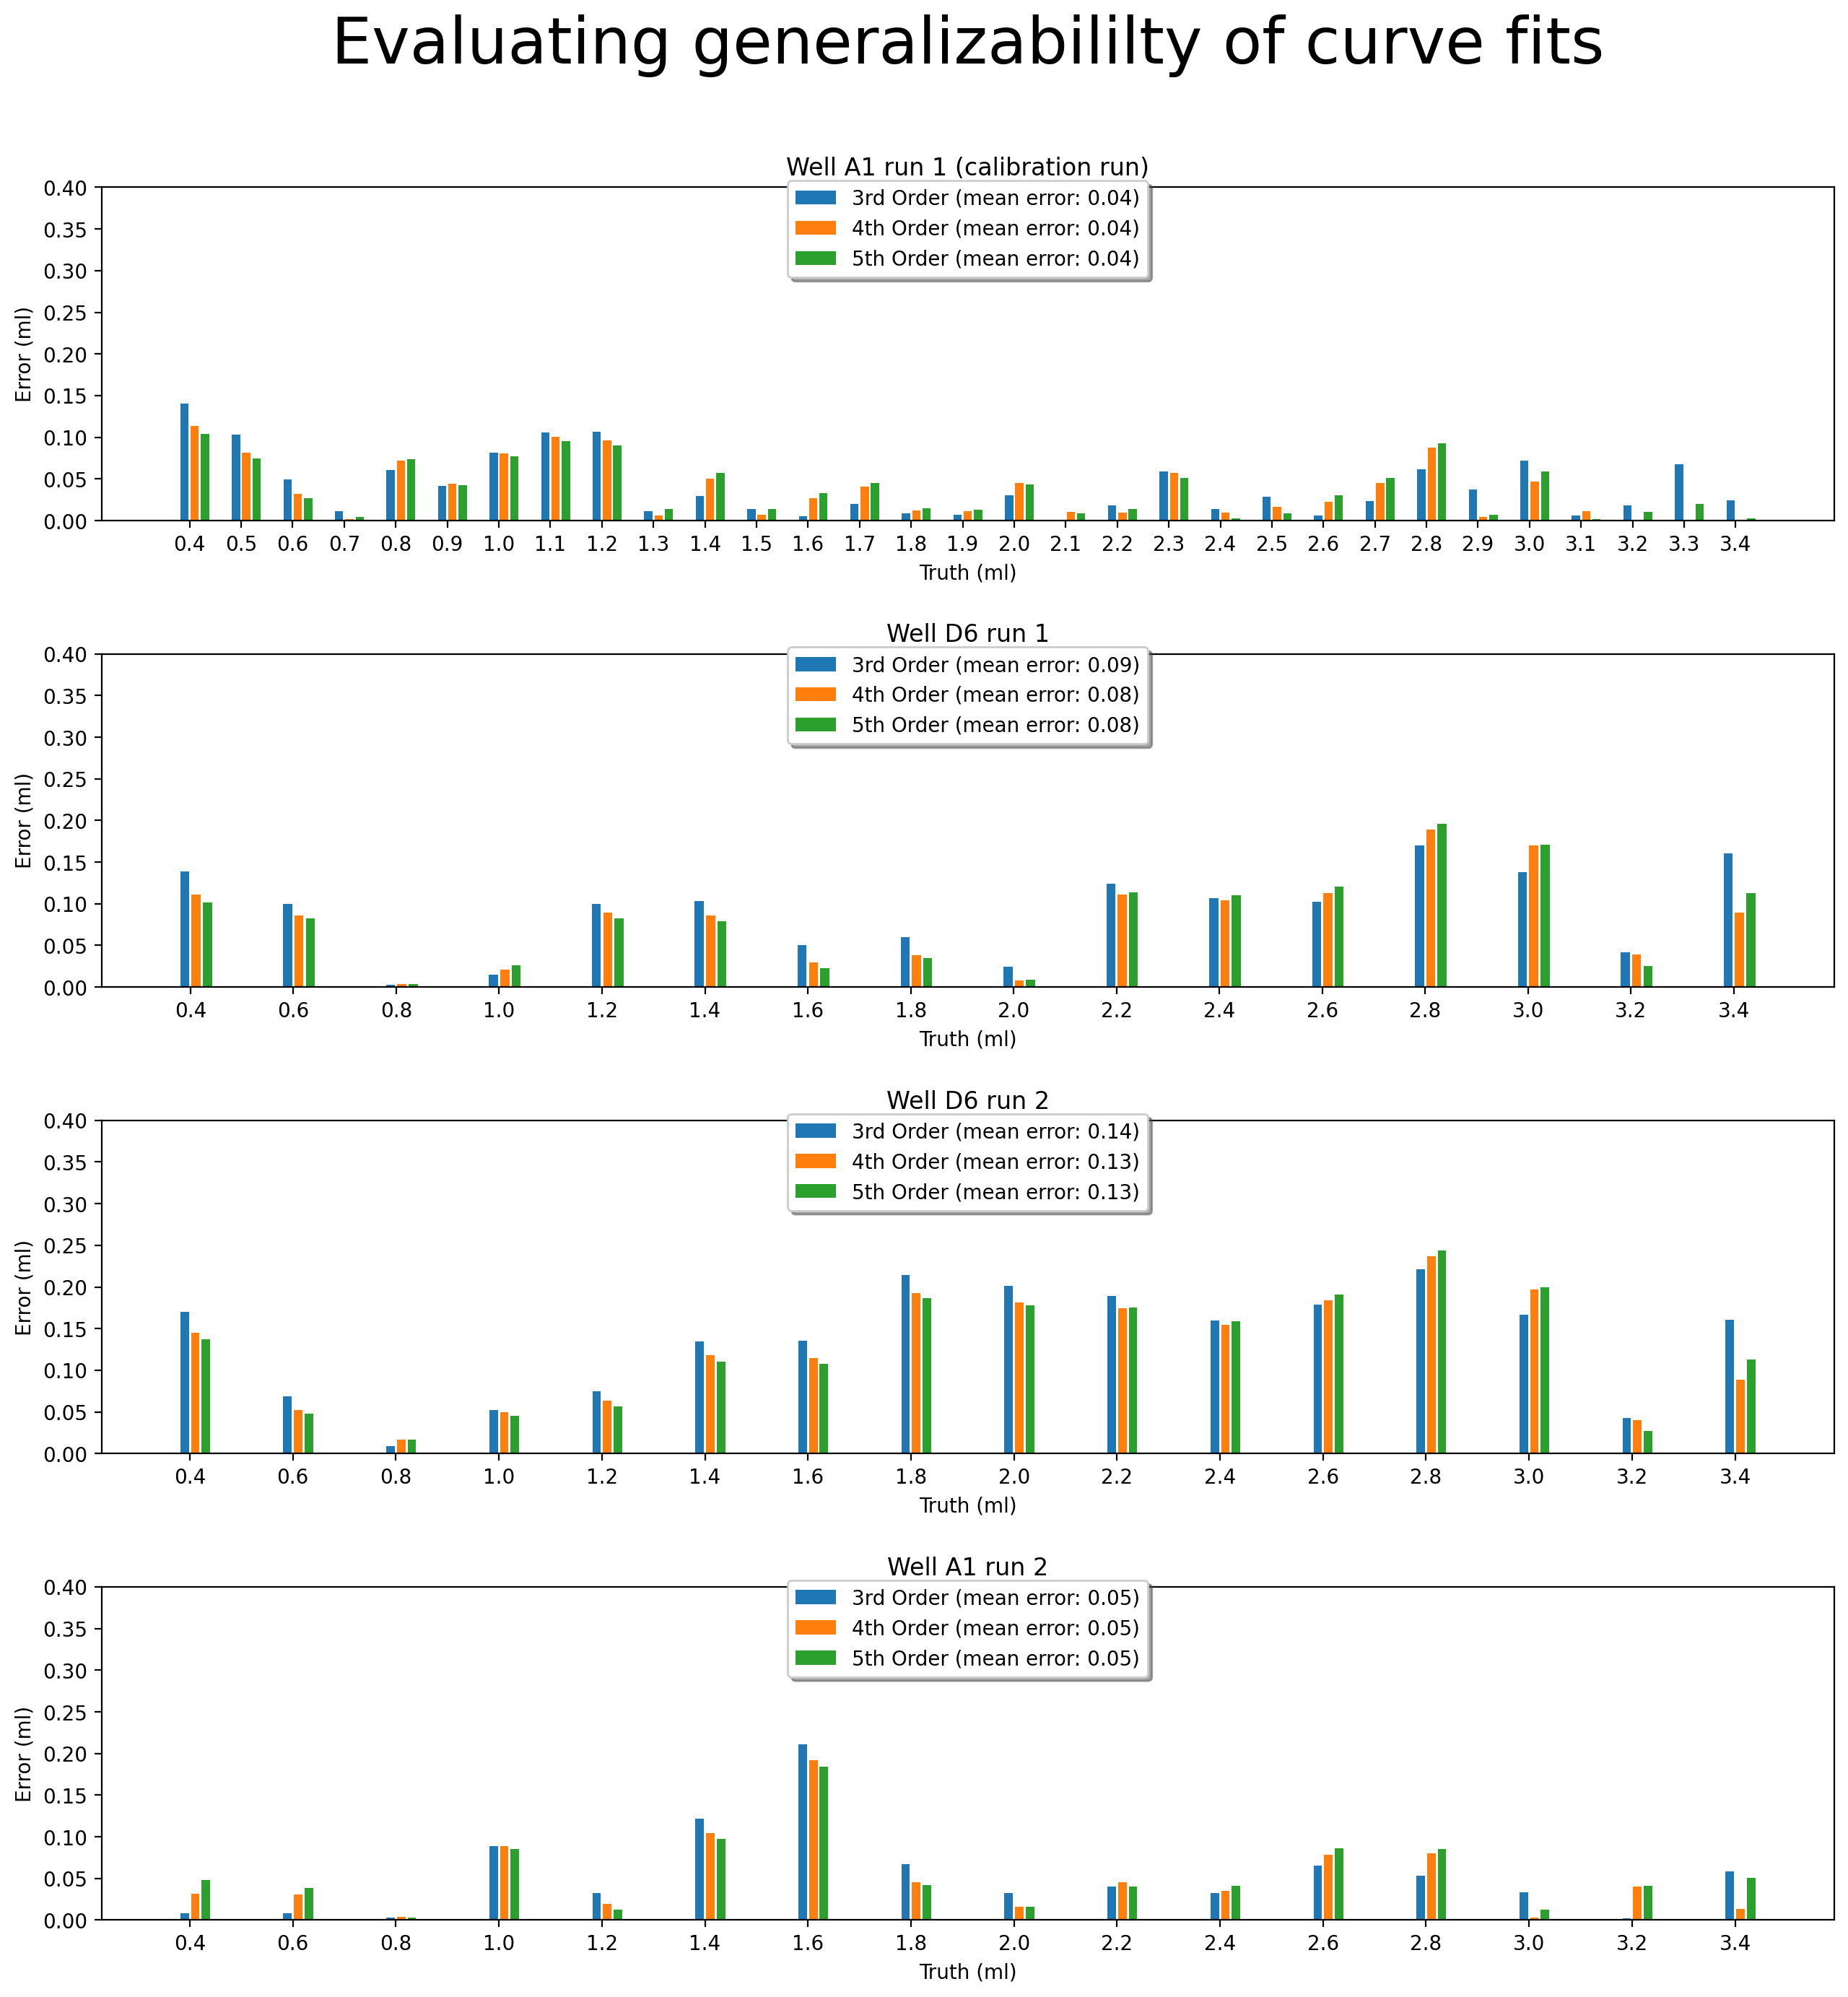

In [121]:
## Plotting the 4 way data showing the curve fits for various sizes
# also plotting error per data point
# a method that resets start and end index after new frame is loaded
def get_frame_reset_start_end_index(frame):
    startIndex = 0
    endIndex = len(frame.volume)
    return frame, startIndex, endIndex

end_trim = 0

plt.rcParams['figure.dpi'] = 200
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.dpi'] = 300

frame = pd.read_csv(path)
plt.rcParams['figure.dpi'] = 200
fig, ax = plt.subplots(2,2,figsize=(9,6))
subplots = [ax[0,0], ax[0,1], ax[1,0], ax[1,1]]

# plt.errorbar(df.volume, df["mean"], yerr=df["var"],fmt="o", marker='s', mfc='red',
#          mec='green')#, ms=20, mew=4)
startIndex = 0
endIndex = len(frame.volume) - end_trim


# print(beginning)
# print(end)
# value = "contour_area"
value = "perimeter"
# ax[0,0].errorbar(frame.volume[startIndex:endIndex], frame[value+"_pb_mean"][startIndex:endIndex], yerr=frame[value+"_pb_stdev"][startIndex:endIndex],
#          fmt="o", mfc='red', ms=4, mew=0, label="Measured Points")#, marker='s', mfc='red',
for i in subplots:  
    i.plot(frame.volume[startIndex:endIndex], frame[value+"_pb_mean"][startIndex:endIndex], 'o', color='red', ms=2, mew=0, label="Measured Points")#, marker='s', mfc='red',
         #mec='green')#, ms=20, mew=4)
# ax[1,0].set_ylabel('Size of Spotlight Perimeter (px)')
# ax[1,0].set_xlabel('ml')
# ax[1,0].set_title("Spotlight Contour Perimeter vs Fluid Volume")
fig.suptitle('Comparison of Polynomial Fits', fontsize=16)

# frame = frame.iloc[[6,26]]
# frame = frame.iloc[::5, :]
# startIndex = 0
# endIndex = len(frame.volume)


sample_val = 6
fig.suptitle('Comparison of Least Squares Polynomial Fits ('+str(sample_val)+' points)', fontsize=12)
frame, startIndex, endIndex = get_frame_reset_start_end_index(pd.read_csv(path))
endIndex -= end_trim

beginning = frame.iloc[[startIndex,startIndex+2]]
end = frame.iloc[[endIndex-3,endIndex-1]]
midframe = frame[startIndex+3:endIndex-3]
# frame = frame.drop(endIndex-3,endIndex-1,startIndex,startIndex+2)
# print("beginning")
# print(beginning.volume)
# print("midframe")
# print(midframe.volume)
# print("end")
# print(end.volume)
frame, startIndex, endIndex = get_frame_reset_start_end_index(beginning.append(midframe.sample(sample_val-4).sort_values(by=['volume'])).append(end))
# print(frame)
print("frame length: ", len(frame.volume))
for i in range(1,len(subplots)):  
    subplots[i].plot(frame.volume[startIndex:endIndex], frame[value+"_pb_mean"][startIndex:endIndex], 'o', color='blue', ms=4, mew=0, label="Calibration Points")


# points = [6,20]
points = [10, 20]
#selected 2 point linear calibration
frame, startIndex, endIndex = get_frame_reset_start_end_index(pd.read_csv(path).iloc[points])
subplots[0].plot(frame.volume[startIndex:endIndex], frame[value+"_pb_mean"][startIndex:endIndex], 'o', color='blue', ms=4, mew=0, label="Calibration Points")
x=frame.volume[startIndex:endIndex]
y=frame[value+"_pb_mean"][startIndex:endIndex]
polyfits = []
order = 1
z = np.polyfit(x, y, order)
z_inv = np.polyfit(y, x, order)
# print(z_inv)
polyfits.append(np.poly1d(z_inv))
p = np.poly1d(z)


frame = pd.read_csv(path)
startIndex = 0
endIndex = len(frame.volume) - end_trim

x2=frame.volume[startIndex:endIndex]
print("x2 length: ", len(x2))
# print(x2)
# wtf
ax[0,0].plot(x2,p(x2),'--',linewidth=1, label="2 Point Linear Fit")



x=frame.volume[startIndex:endIndex]
print("x length: ", len(x))
y=frame[value+"_pb_mean"][startIndex:endIndex]
# polyfits = []
colors = [0,"tab:orange", "tab:green","tab:red"]
labels = [0,"3rd Order", "4th Order", "5th Order"]
plt_index = 1
for i in {3,4,5}:
    order = i
    z = np.polyfit(x, y, order)
    z_inv = np.polyfit(y, x, order)
    # print(z_inv)
    polyfits.append(np.poly1d(z_inv))
    p = np.poly1d(z)
    frame = pd.read_csv(path)
    startIndex = 0
    endIndex = len(frame.volume) - end_trim

    x2=frame.volume[startIndex:endIndex]
    print("x2 length: ", len(x2))
    # print(x2)
    # wtf
    subplots[plt_index].plot(x2,p(x2),'--',linewidth=1, color = colors[plt_index],label = labels[plt_index])
    plt_index += 1
    color = 0.8

#for all axes generate legend
for i in subplots:
    i.legend(loc='upper left', fontsize=6)
    # i.set_xlabel('ml')
    i.set_ylabel('Size of Spotlight Perimeter (px)')
    # i.set_title("Spotlight Contour Perimeter vs Fluid Volume")
    # i.grid(True)
    # i.set_xlim(0,100)
    # i.set_ylim(0,100)
    # i.set_aspect('equal')
    # i.set_yticks(np.arange(0, 100, 10))
    # i.set_xticks(np.arange(0, 100, 10))
    # i.tick_params(axis='both', which='major', labelsize=10)
    # i.tick_params(axis='both', which='minor', labelsize=10)
    # i.tick_params(axis='both', which='major', length=10)
    # i.tick_params(axis='both', which='minor', length=5)
    # i.tick_params(axis='both', which='major', width=1.5)
    # i.tick_params(axis='both', which='minor', width=1.5)
    # i.tick_params(axis='both', which='major', pad=5)
    # i.tick_params(axis='both', which='minor', pad=5)
    # i.tick_params(axis='both', which='major', direction='in')
    # i.tick_params(axis='both', which='minor', direction='in')
    # i.tick_params(axis='both', which='major', bottom=True, top=True, left=True, right=True)
    # i.tick_params(axis='both', which='minor', bottom=True, top=True, left=True, right=True)
    # i.tick_params(axis='both', which='major', labelsize=10)
    # i.tick_params(axis='both', which='minor', labelsize=10)
    # i.tick_params(axis='both', which='major', length=10)
    # i.tick_params(axis='both

# plt.savefig("/Users/pierre/Pictures/biology/Blob-Measuring/Level-Measurement-Experiment/Figure/Error_comparisons/curve_comparison_"+str(sample_val)+"_point.png")




frame = pd.read_csv(path)
startIndex = 0
endIndex = len(frame.volume) - end_trim
x=frame.volume[startIndex:endIndex]
y=frame[value+"_pb_mean"][startIndex:endIndex]

#frame2 is test set and frame is training set
# y=frame2[value+"_pb_mean"][startIndex:endIndex]

index = np.arange(len(x))
bar_width = 0.2



# fig3, ax3 = plt.subplots(figsize=(15,5))
fig3, ax3 = plt.subplots(4,1,figsize=(15,15))
# subplots = [ax4[0,0], ax4[0,1], ax4[1,0], ax4[1,1]]
subplots = [ax3[0], ax3[1], ax3[2]]

paths = [path, path2, path3, path4]
path_index = 0

frame = pd.read_csv(path)
startIndex = 0
endIndex = len(frame.volume) - end_trim
x=frame.volume[startIndex:endIndex]
y=frame[value+"_pb_mean"][startIndex:endIndex]

data_len = len(x)

# path="/Users/pierre/Pictures/biology/Blob-Measuring/Level-Measurement-Experiment/stream-captures/19-August-2022T19:36:26-swirl-A1-2-100s/all_values.csv"
# frame =  pd.read_csv(path)
# path2="/Users/pierre/Pictures/biology/Blob-Measuring/Level-Measurement-Experiment/stream-captures/19-August-2022T19:04:48-swirl-D6-1/all_values.csv"
# frame2 = pd.read_csv(path2)
# path3="/Users/pierre/Pictures/biology/Blob-Measuring/Level-Measurement-Experiment/stream-captures/19-August-2022T19:16:21-swirl-D6-2/all_values.csv"
# frame3 =  pd.read_csv(path3)
# path4= "/Users/pierre/Pictures/biology/Blob-Measuring/Level-Measurement-Experiment/stream-captures/19-August-2022T19:25:43-swirl-A1-1/all_values.csv"
# frame4 =  pd.read_csv(path4)
titles = ["Well A1 run 1 (calibration run)", "Well D6 run 1", "Well D6 run 2", "Well A1 run 2", ]
end_trim = 0
for axes in ax3:
    frame = pd.read_csv(paths[path_index])
    startIndex = 0
    endIndex = len(frame.volume) - end_trim
    x=frame.volume[startIndex:endIndex]
    y=frame[value+"_pb_mean"][startIndex:endIndex]

    index = np.arange(len(x))

    error1 = abs(x - polyfits[0](y))
    # ax2.plot(x,error1,'o',mfc='red',ms=4,mew=0)
    error2 = abs(x - polyfits[1](y))
    # ax2.plot(x,error2,'o',mfc='green',ms=4,mew=0)
    error3 = abs(x - polyfits[2](y))

    error4 = abs(x - polyfits[3](y))

    scaler = data_len/len(x)
    if path_index == 1:
        scaler = data_len/(len(x)+1)

    # summer = axes.bar(index*scaler, error1, bar_width,
    #                 label="1st Order 2 Point Fit (mean error: "+str(round(sum(error1)/len(index),2))+")")
    winter = axes.bar((index)*scaler + bar_width, error2,
                    bar_width*0.8, label="3rd Order (mean error: "+str(round(sum(error2)/len(index),2))+")")
    barf = axes.bar((index)*scaler + 2*bar_width, error3,
                    bar_width*0.8, label="4th Order (mean error: "+str(round(sum(error3)/len(index),2))+")")
    carp = axes.bar((index)*scaler + 3*bar_width, error4,
                    bar_width*0.8, label="5th Order (mean error: "+str(round(sum(error3/len(index)),2))+")")

    axes.set_xlabel('Truth (ml)')
    axes.set_ylabel('Error (ml)')
    axes.set_title(titles[path_index])
    # ax3.set_title("Error from " + str(sample_val) + " point polynomial fit vs 2 point linear fit")
    axes.set_xticks((index*scaler+1.5*bar_width))
    axes.set_xticklabels(x)
    axes.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=1, fancybox=True, shadow=True)
    axes.set_ylim(0,0.4)
    # axes.set_xlim(-1, data_len+1)

    path_index += 1

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
fig3.suptitle('Evaluating generalizabililty of curve fits', fontsize=32)
# plt.savefig("/Users/pierre/Pictures/biology/Blob-Measuring/Level-Measurement-Experiment/Figure/Error_comparisons/Error-comparison_"+str(sample_val)+"_point.png")

## Plot comparison of error for fixed polynomial fit, bars compare wells

/var/folders/5z/d1d_q74d1hd653s14vwq9v800000gn/T/ipykernel_86660/3603966070.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frame, startIndex, endIndex = get_frame_reset_start_end_index(beginning.append(midframe.sample(sample_val-4).sort_values(by=['volume'])).append(end))
/var/folders/5z/d1d_q74d1hd653s14vwq9v800000gn/T/ipykernel_86660/3603966070.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frame, startIndex, endIndex = get_frame_reset_start_end_index(beginning.append(midframe.sample(sample_val-4).sort_values(by=['volume'])).append(end))


frame length:  6
x2 length:  31
x length:  31
x2 length:  31
x2 length:  31
x2 length:  31


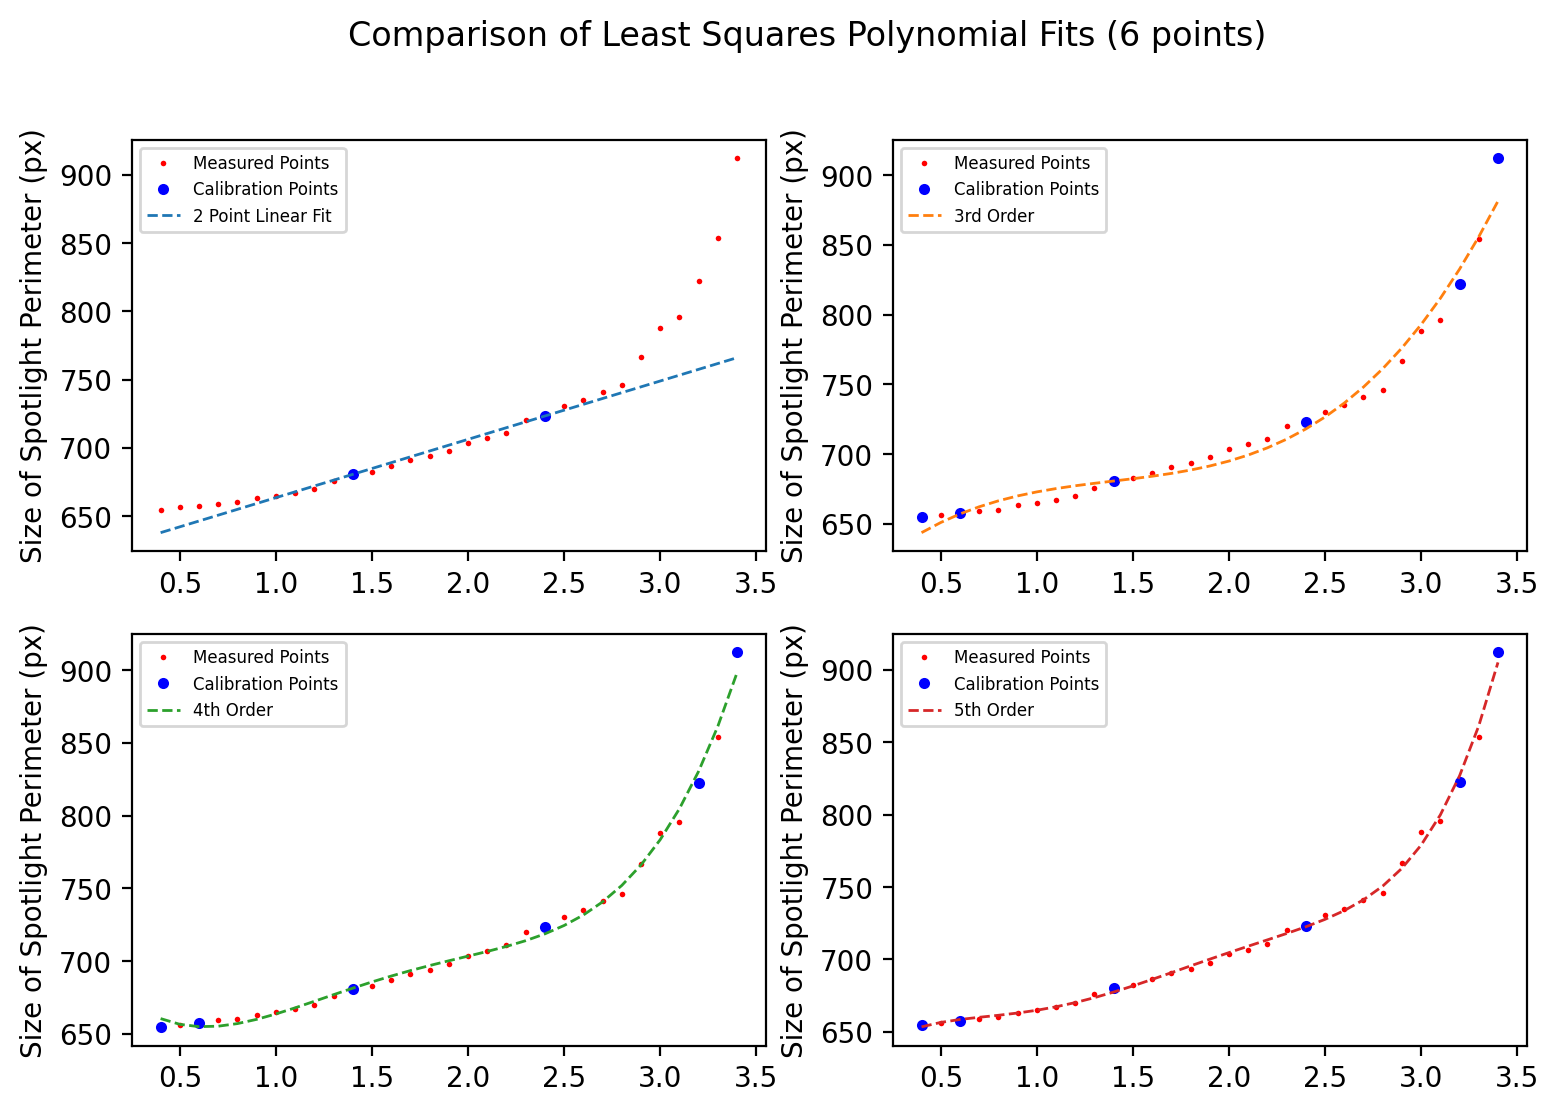

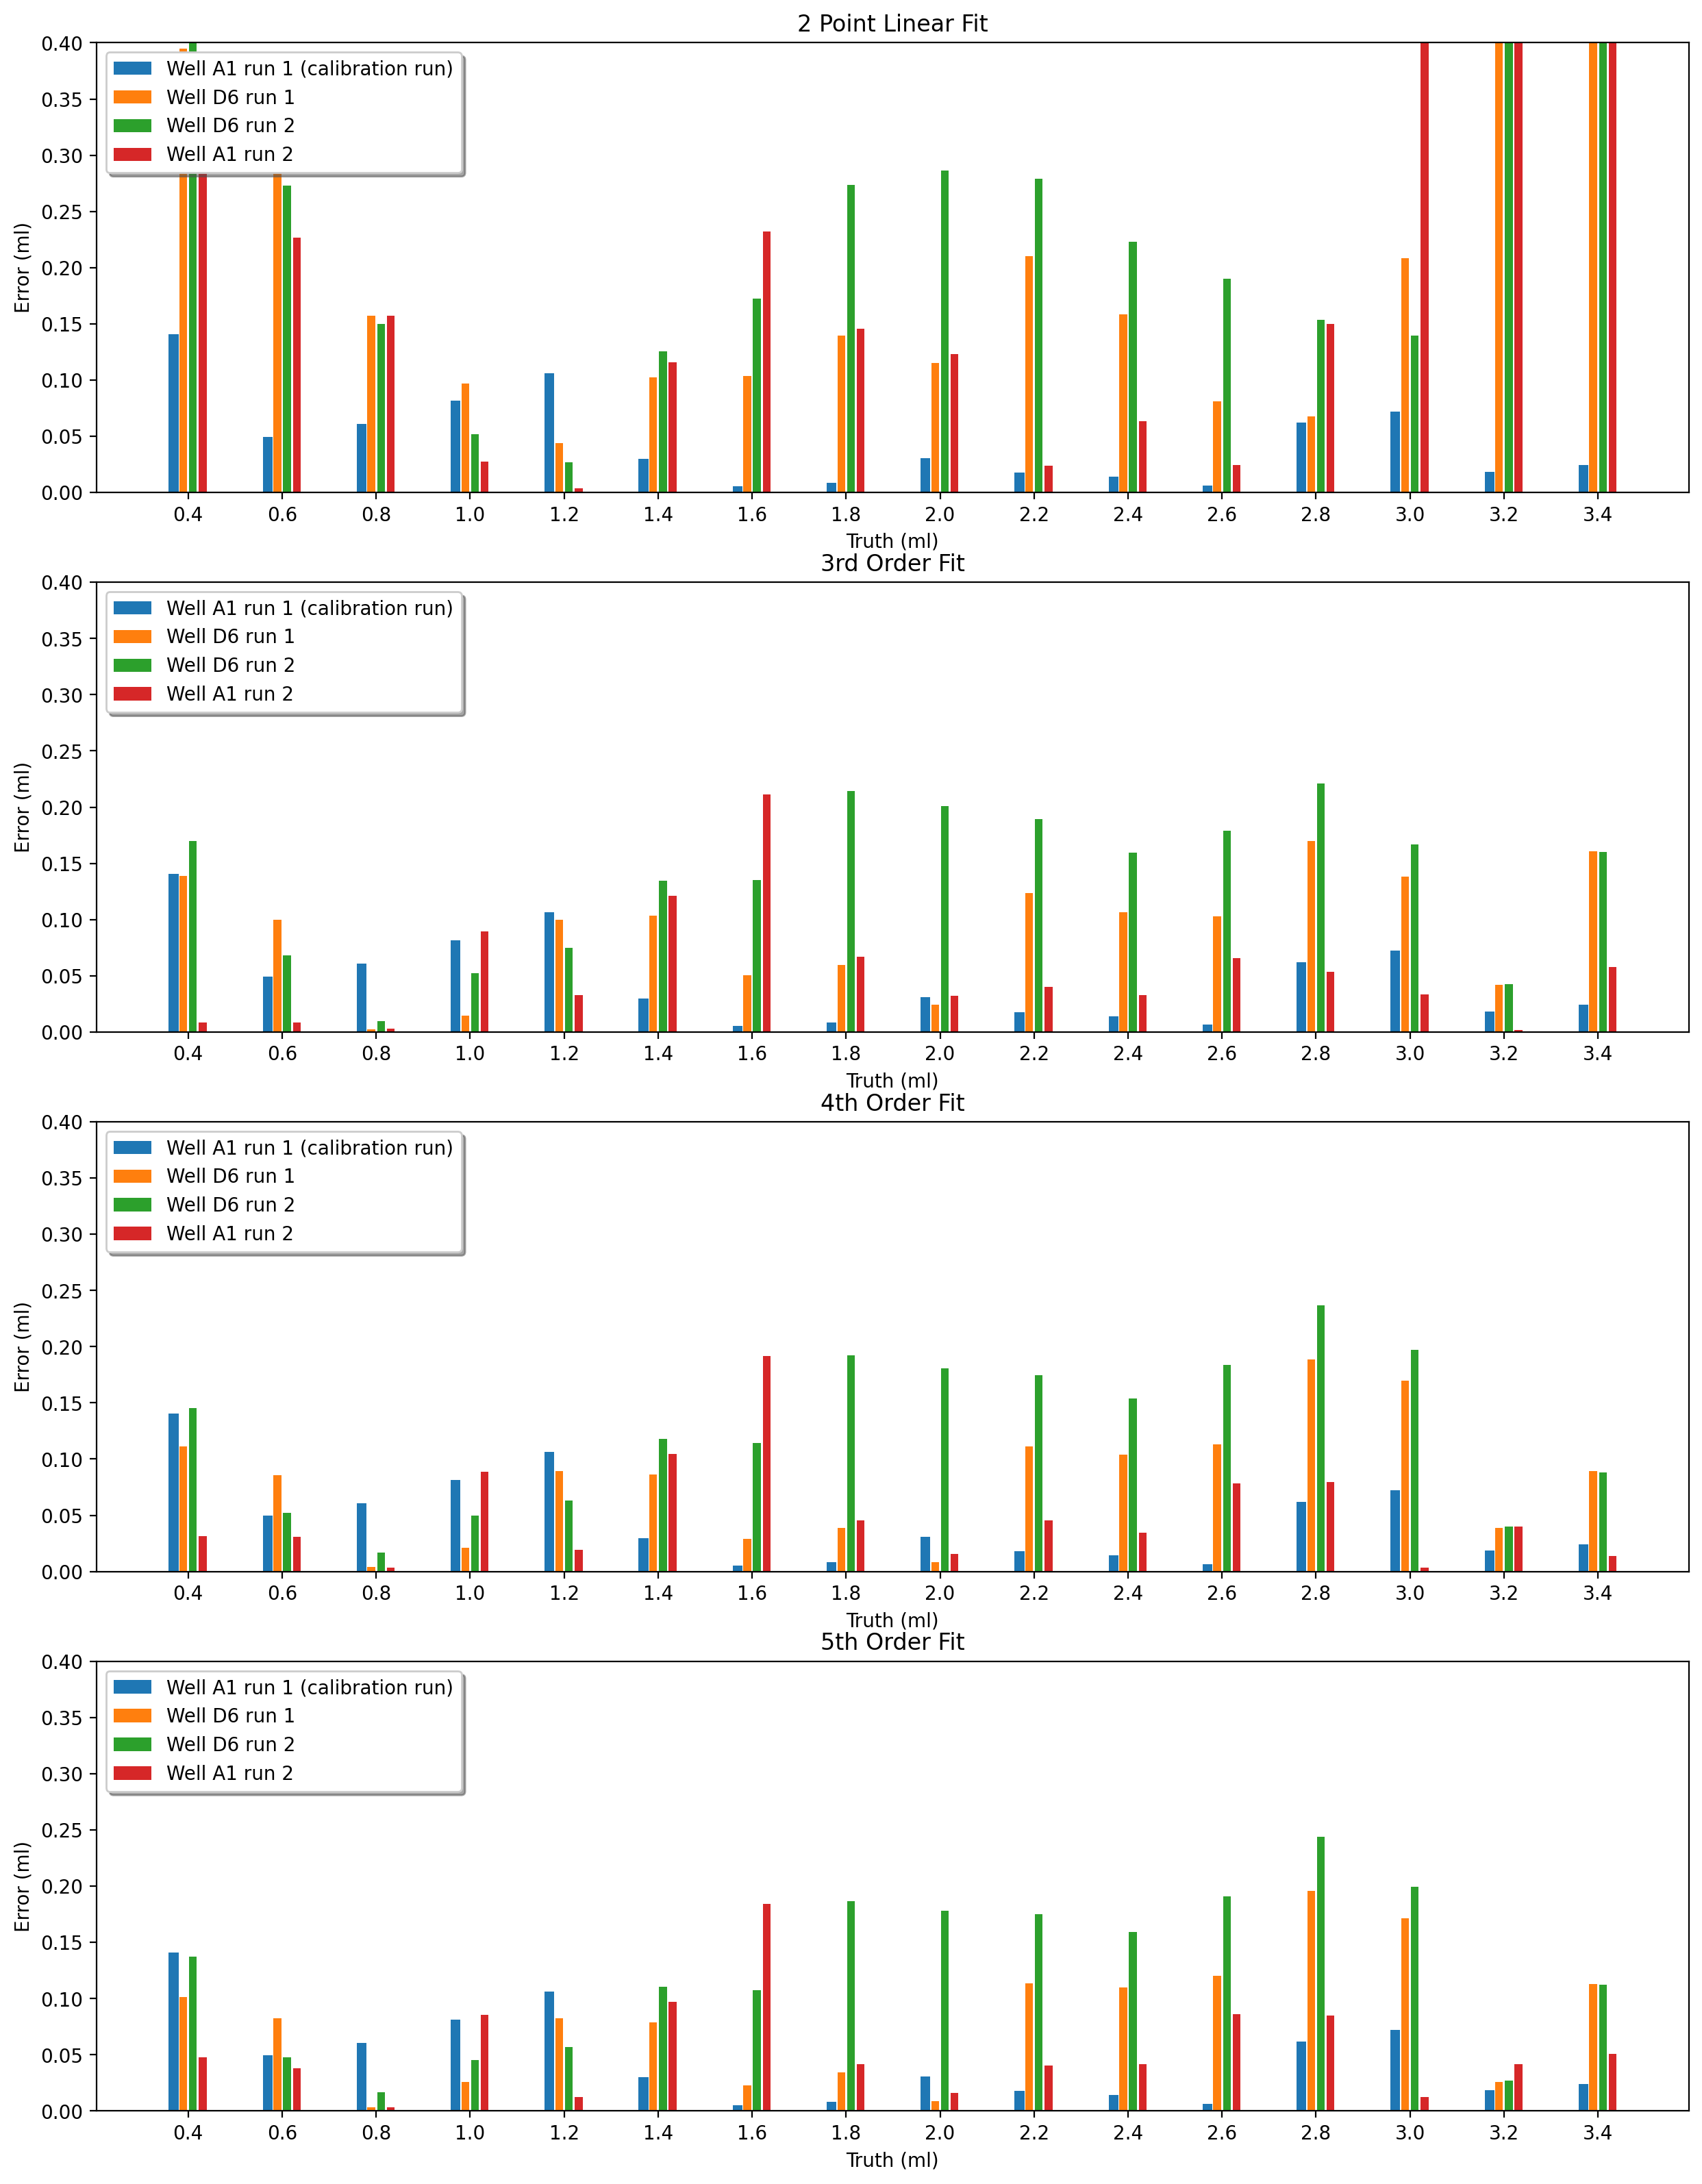

In [48]:
## Plotting the 4 way data showing the curve fits for various sizes
# also plotting error per data point
# a method that resets start and end index after new frame is loaded
def get_frame_reset_start_end_index(frame):
    startIndex = 0
    endIndex = len(frame.volume)
    return frame, startIndex, endIndex

end_trim = 0

plt.rcParams['figure.dpi'] = 200
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.dpi'] = 300

frame = pd.read_csv(path)
plt.rcParams['figure.dpi'] = 200
fig, ax = plt.subplots(2,2,figsize=(9,6))
subplots = [ax[0,0], ax[0,1], ax[1,0], ax[1,1]]

# plt.errorbar(df.volume, df["mean"], yerr=df["var"],fmt="o", marker='s', mfc='red',
#          mec='green')#, ms=20, mew=4)
startIndex = 0
endIndex = len(frame.volume) - end_trim


# print(beginning)
# print(end)
# value = "contour_area"
value = "perimeter"
# ax[0,0].errorbar(frame.volume[startIndex:endIndex], frame[value+"_pb_mean"][startIndex:endIndex], yerr=frame[value+"_pb_stdev"][startIndex:endIndex],
#          fmt="o", mfc='red', ms=4, mew=0, label="Measured Points")#, marker='s', mfc='red',
for i in subplots:  
    i.plot(frame.volume[startIndex:endIndex], frame[value+"_pb_mean"][startIndex:endIndex], 'o', color='red', ms=2, mew=0, label="Measured Points")#, marker='s', mfc='red',
         #mec='green')#, ms=20, mew=4)
# ax[1,0].set_ylabel('Size of Spotlight Perimeter (px)')
# ax[1,0].set_xlabel('ml')
# ax[1,0].set_title("Spotlight Contour Perimeter vs Fluid Volume")
fig.suptitle('Comparison of Polynomial Fits', fontsize=16)

# frame = frame.iloc[[6,26]]
# frame = frame.iloc[::5, :]
# startIndex = 0
# endIndex = len(frame.volume)


sample_val = 6
fig.suptitle('Comparison of Least Squares Polynomial Fits ('+str(sample_val)+' points)', fontsize=12)
frame, startIndex, endIndex = get_frame_reset_start_end_index(pd.read_csv(path))
endIndex -= end_trim


points = [10, 20]

beginning = frame.iloc[[startIndex,startIndex+2]]
end = frame.iloc[[endIndex-3,endIndex-1]]
midframe = frame.iloc[points]
# midframe = frame[startIndex+3:endIndex-3]

# frame = frame.drop(endIndex-3,endIndex-1,startIndex,startIndex+2)
# print("beginning")
# print(beginning.volume)
# print("midframe")
# print(midframe.volume)
# print("end")
# print(end.volume)
frame, startIndex, endIndex = get_frame_reset_start_end_index(beginning.append(midframe.sample(sample_val-4).sort_values(by=['volume'])).append(end))
# print(frame)
print("frame length: ", len(frame.volume))
for i in range(1,len(subplots)):  
    subplots[i].plot(frame.volume[startIndex:endIndex], frame[value+"_pb_mean"][startIndex:endIndex], 'o', color='blue', ms=4, mew=0, label="Calibration Points")


# points = [6,20]

#selected 2 point linear calibration
frame, startIndex, endIndex = get_frame_reset_start_end_index(pd.read_csv(path).iloc[points])
subplots[0].plot(frame.volume[startIndex:endIndex], frame[value+"_pb_mean"][startIndex:endIndex], 'o', color='blue', ms=4, mew=0, label="Calibration Points")
x=frame.volume[startIndex:endIndex]
y=frame[value+"_pb_mean"][startIndex:endIndex]
polyfits = []
order = 1
z = np.polyfit(x, y, order)
z_inv = np.polyfit(y, x, order)
# print(z_inv)
polyfits.append(np.poly1d(z_inv))
p = np.poly1d(z)


frame = pd.read_csv(path)
startIndex = 0
endIndex = len(frame.volume) - end_trim

x2=frame.volume[startIndex:endIndex]
print("x2 length: ", len(x2))
# print(x2)
# wtf
ax[0,0].plot(x2,p(x2),'--',linewidth=1, label="2 Point Linear Fit")



x=frame.volume[startIndex:endIndex]
print("x length: ", len(x))
y=frame[value+"_pb_mean"][startIndex:endIndex]
# polyfits = []
colors = [0,"tab:orange", "tab:green","tab:red"]
labels = [0,"3rd Order", "4th Order", "5th Order"]
plt_index = 1
for i in {3,4,5}:
    order = i
    z = np.polyfit(x, y, order)
    z_inv = np.polyfit(y, x, order)
    # print(z_inv)
    polyfits.append(np.poly1d(z_inv))
    p = np.poly1d(z)
    frame = pd.read_csv(path)
    startIndex = 0
    endIndex = len(frame.volume) - end_trim

    x2=frame.volume[startIndex:endIndex]
    print("x2 length: ", len(x2))
    # print(x2)
    # wtf
    subplots[plt_index].plot(x2,p(x2),'--',linewidth=1, color = colors[plt_index],label = labels[plt_index])
    plt_index += 1
    color = 0.8

#for all axes generate legend
for i in subplots:
    i.legend(loc='upper left', fontsize=6)
    # i.set_xlabel('ml')
    i.set_ylabel('Size of Spotlight Perimeter (px)')

# plt.savefig("/Users/pierre/Pictures/biology/Blob-Measuring/Level-Measurement-Experiment/Figure/Error_comparisons/curve_comparison_"+str(sample_val)+"_point.png")




frame = pd.read_csv(path)
startIndex = 0
endIndex = len(frame.volume) - end_trim
x=frame.volume[startIndex:endIndex]
y=frame[value+"_pb_mean"][startIndex:endIndex]

#frame2 is test set and frame is training set
# y=frame2[value+"_pb_mean"][startIndex:endIndex]

index = np.arange(len(x))
bar_width = 0.2



fig3, ax3 = plt.subplots(4,1,figsize=(15,20))
# fig3, axes = plt.subplots(figsize=(15,5))
# subplots = [ax4[0,0], ax4[0,1], ax4[1,0], ax4[1,1]]
subplots = [ax3[0], ax3[1], ax3[2],ax3[3]]

path="/Users/pierre/Pictures/biology/Blob-Measuring/Level-Measurement-Experiment/stream-captures/19-August-2022T19:36:26-swirl-A1-2-100s/all_values.csv"
frame =  pd.read_csv(path)
path2="/Users/pierre/Pictures/biology/Blob-Measuring/Level-Measurement-Experiment/stream-captures/19-August-2022T19:04:48-swirl-D6-1/all_values.csv"
frame2 = pd.read_csv(path2)
path3="/Users/pierre/Pictures/biology/Blob-Measuring/Level-Measurement-Experiment/stream-captures/19-August-2022T19:16:21-swirl-D6-2/all_values.csv"
frame3 =  pd.read_csv(path3)
path4= "/Users/pierre/Pictures/biology/Blob-Measuring/Level-Measurement-Experiment/stream-captures/19-August-2022T19:25:43-swirl-A1-1/all_values.csv"
frame4 =  pd.read_csv(path4)

paths = [path, path2, path3, path4]
path_index = 0

frame = pd.read_csv(path)
startIndex = 0
endIndex = len(frame.volume) - end_trim
x=frame.volume[startIndex:endIndex]
y=frame[value+"_pb_mean"][startIndex:endIndex]

data_len = len(x)



titles = ["2 Point Linear Fit", "3rd Order Fit", "4th Order Fit", "5th Order Fit"]
labels = ["Well A1 run 1 (calibration run)", "Well D6 run 1", "Well D6 run 2", "Well A1 run 2"]
label_index = 0
end_trim = 0


# frame = pd.read_csv(i)
model_order = 0
for axes in subplots:
    label_index = 0
## this selects only values that are present in the other frames for comparison
    frame = frame[frame.volume.isin(frame2.volume)]
    startIndex = 0
    endIndex = len(frame.volume) - end_trim
    x=frame.volume[startIndex:endIndex]
    x_labels = frame.volume[startIndex:endIndex]
    y=frame[value+"_pb_mean"][startIndex:endIndex]

    index1 = np.arange(len(x))
    error1 = abs(x - polyfits[1](y))
    scaler = data_len/len(x)
    summer = axes.bar(index1*scaler, error1, bar_width,
                    label=labels[label_index])
    label_index += 1
    # ax2.plot(x,error1,'o',mfc='red',ms=4,mew=0)
    axes.set_xlabel('Truth (ml)')
    axes.set_ylabel('Error (ml)')
    axes.set_title(titles[path_index])
    # ax3.set_title("Error from " + str(sample_val) + " point polynomial fit vs 2 point linear fit")
    axes.set_xticks((index1*scaler+1.5*bar_width))
    axes.set_xticklabels(x_labels)

    x=frame2.volume[startIndex:endIndex]
    y=frame2[value+"_pb_mean"][startIndex:endIndex]
    index2 = np.arange(len(x))
    scaler = data_len/len(x)
    error2 = abs(x - polyfits[model_order](y))

    winter = axes.bar((index2)*scaler + bar_width, error2,
                    bar_width*0.8, label=labels[label_index])
    label_index += 1



    # ax2.plot(x,error2,'o',mfc='green',ms=4,mew=0)
    x=frame3.volume[startIndex:endIndex]
    y=frame3[value+"_pb_mean"][startIndex:endIndex]
    index3 = np.arange(len(x))
    error3 = abs(x - polyfits[model_order](y))
    scaler = data_len/len(x)
    barf = axes.bar((index3)*scaler + 2*bar_width, error3,
                    bar_width*0.8, label=labels[label_index])
    label_index += 1


    x=frame4.volume[startIndex:endIndex]
    y=frame4[value+"_pb_mean"][startIndex:endIndex]
    index4 = np.arange(len(x))
    error4 = abs(x - polyfits[model_order](y))
    scaler = data_len/len(x)

    carp = axes.bar((index4)*scaler + 3*bar_width, error4,
                    bar_width*0.8, label=labels[label_index])
    label_index += 1


    axes.legend(loc='upper left', ncol=1, fancybox=True, shadow=True)
    axes.set_ylim(0,0.4)
    # axes.set_xlim(-1, data_len+1)

    path_index += 1
    model_order += 1

# plt.subplots_adjust(left=0.1,
#                     bottom=0.1, 
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=0.4, 
#                     hspace=0.4)
# fig3.suptitle('Evaluating generalizabililty of curve fits', fontsize=32)
# plt.savefig("/Users/pierre/Pictures/biology/Blob-Measuring/Level-Measurement-Experiment/Figure/Error_comparisons/Error-comparison_"+str(sample_val)+"_point.png")

In [26]:
print(frame.volume[frame.volume.isin(frame2.volume)])


0     0.4
2     0.6
4     0.8
6     1.0
8     1.2
10    1.4
12    1.6
14    1.8
16    2.0
18    2.2
20    2.4
22    2.6
24    2.8
26    3.0
28    3.2
30    3.4
Name: volume, dtype: float64


## Plot change in error as number of points in calibration changes

/Users/pierre/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3397: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/pierre/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3397: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/pierre/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3397: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/pierre/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3397: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/pierre/miniforge3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3397: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/pierre/miniforge3/lib/python3.9/site-p

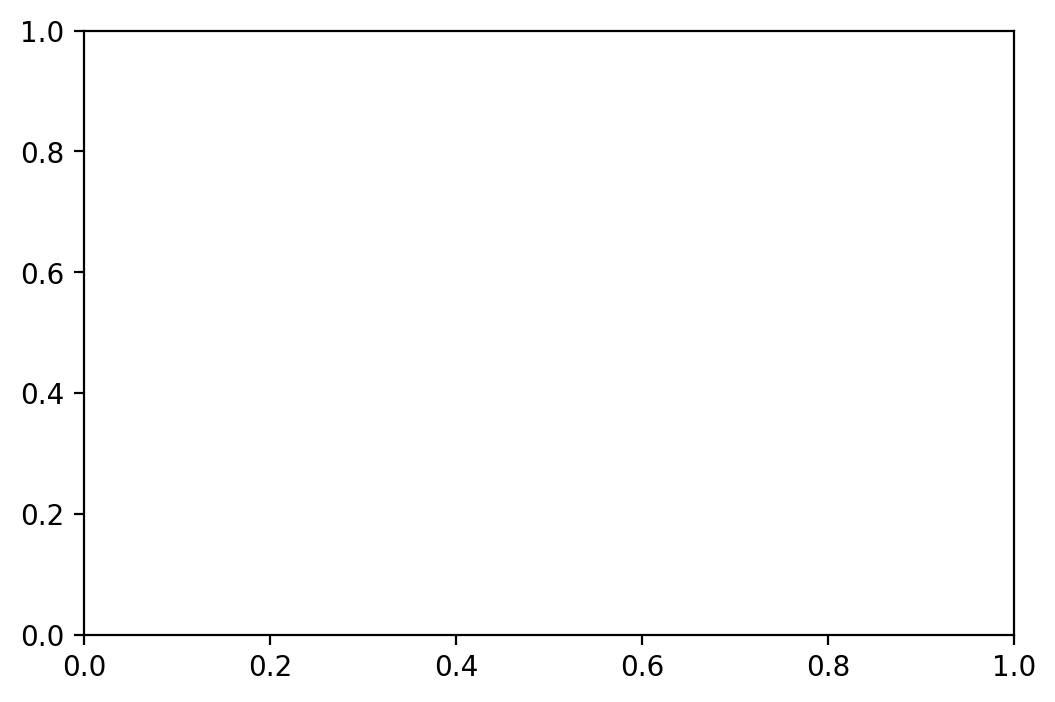

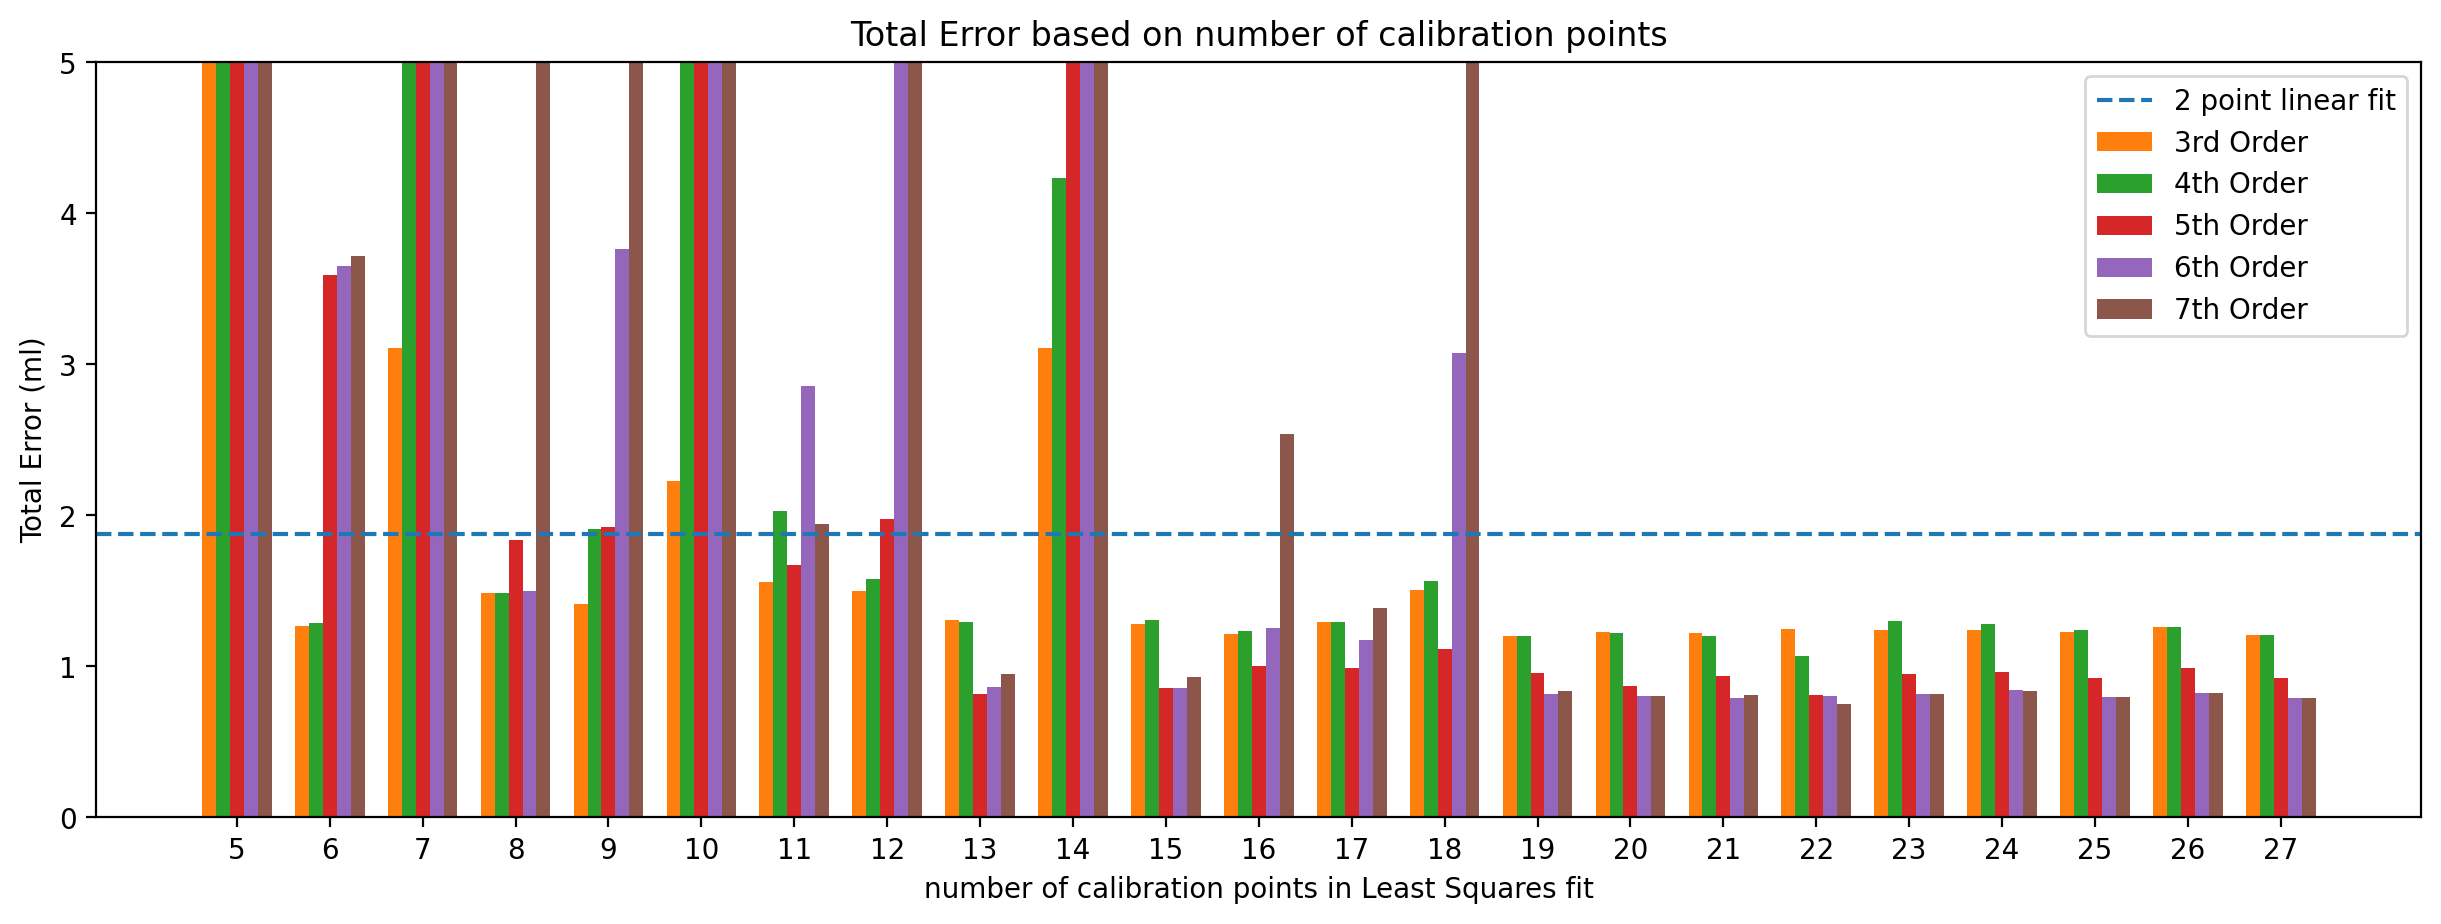

In [46]:
#plot total error as a function of sample size
path = path4
frame = pd.read_csv(path)
plt.rcParams['figure.dpi'] = 200
fig, ax = plt.subplots()
startIndex = 0
endIndex = len(frame.volume)-2

beginning = frame.iloc[[startIndex,startIndex+2]]
end = frame.iloc[[endIndex-3,endIndex-1]]

errors1 = []
errors2 = []
errors3 = []
errors4 = []
errors5 = []
errors6 = []

index1 = range(5,len(frame.volume[startIndex:endIndex]))
for i in index1:
    frame = pd.read_csv(path)
    sample_val = i
    # frame = beginning.append(frame[startIndex+2:endIndex-3].sample(sample_val-4).sort_values(by=['volume'])).append(end)
    frame = frame.sample(sample_val).sort_values(by=['volume'])
    # print(frame)
    # print("frame length: ", len(frame.volume))
    startIndex = 0
    endIndex = len(frame.volume)


    #frame = frame.iloc[[6,26]]



    x=frame.volume[startIndex:endIndex]
    # print("x length: ", len(x))
    y=frame[value+"_pb_mean"][startIndex:endIndex]
    polyfits = []
    for i in {1,3,4,5,6,7}:
        order = i
        z = np.polyfit(x, y, order)
        z_inv = np.polyfit(y, x, order)
        # print(z_inv)
        polyfits.append(np.poly1d(z_inv))
        p = np.poly1d(z)
        frame = pd.read_csv(path)
        startIndex = 0
        endIndex = len(frame.volume) - 2

        # x2=frame.volume[startIndex:endIndex]
        # wtf
        color = 0.8


    frame = pd.read_csv(path)
    startIndex = 0
    endIndex = len(frame.volume)-2
    x=frame.volume[startIndex:endIndex]
    y=frame[value+"_pb_mean"][startIndex:endIndex]

    #frame2 is test set and frame is training set
    # y=frame2["547.5650849233924"][startIndex:endIndex]

    error1 = abs(x - polyfits[0](y))
    errors1.append(sum(error1))
    # ax2.plot(x,error1,'o',mfc='red',ms=4,mew=0)
    error2 = abs(x - polyfits[1](y))
    errors2.append(sum(error2))
    # ax2.plot(x,error2,'o',mfc='green',ms=4,mew=0)
    error3 = abs(x - polyfits[2](y))
    errors3.append(sum(error3))

    error4 = abs(x - polyfits[3](y))
    errors4.append(sum(error4))

    error5= abs(x - polyfits[4](y))
    errors5.append(sum(error5))

    error6 = abs(x - polyfits[5](y))
    errors6.append(sum(error6))


fig3, ax3 = plt.subplots(figsize=(15,5))
index = np.arange(len(index1))
bar_width = 0.15

# summer = ax3.bar(index, errors1, bar_width,
#                 label="1st Order")


#list of zeros of length errors1
zeros = [0]*len(errors1)

colorfiller = ax3.bar(index, zeros,
                 bar_width)

winter = ax3.bar(index, errors2,
                 bar_width, label="3rd Order")#, color = "tab:orange")
barf = ax3.bar(index+bar_width, errors3,
                 bar_width, label="4th Order")#, color = "tab:green")
                 
barf2 = ax3.bar(index+2*bar_width, errors4, bar_width, label="5th Order")

barf3 = ax3.bar(index+3*bar_width, errors5, bar_width, label="6th Order")

barf4= ax3.bar(index+4*bar_width, errors6, bar_width, label="7th Order")

# ax3.plot(1.8*np.ones(len(errors1)),errors1,'o',mfc='red',ms=4,mew=0)
ax3.axhline(y=1.88, color='tab:blue', linestyle='--', label="2 point linear fit")
# carp = ax3.bar(index+3*bar_width, error4,
#                  bar_width, label="7th Order (total error: "+str(round(sum(error3),2))+")")

ax3.set_xlabel('number of calibration points in Least Squares fit')
ax3.set_ylabel('Total Error (ml)')
ax3.set_title("Total Error based on number of calibration points")
ax3.set_xticks(index+2*bar_width)
ax3.set_xticklabels(index+ 5)
#set y axis of ax3 to max out at 2.5
ax3.set_ylim(0,5)

ax3.legend()
# plt.savefig("/Users/pierre/Pictures/biology/Blob-Measuring/Level-Measurement-Experiment/Figure/Error_comparisons/total_error_comparison_from_points2.png")
# ax.plot(errors1)
# ax.plot(errors2)
# ax.plot(errors3)
# ax.legend()

In [121]:
errors1

[3.513039257817039,
 3.3021581295521325,
 2.6646769287997967,
 2.984079179986072,
 2.115748449006285,
 2.3386057247103973,
 2.560317669868739,
 2.2042174017885237,
 1.9911477780826217,
 2.1901147432038237,
 2.1599995074048333,
 2.144174183518445,
 1.9823664637322858,
 2.0401247595523033,
 1.9429291200801821,
 1.972993690101156,
 2.030900949753811,
 1.989022056550033,
 1.9141126554621901,
 1.918124536369184,
 1.929383399719541,
 1.8871634278010068,
 1.8162077503872864,
 1.8451606003322172,
 1.8775237358537047,
 1.867021143968738,
 1.877174451369482,
 1.8792408307126318]

## Plot Errors from 5 point curve fit of various orders

2.4793236961923544 1.9800357746233783 1.6475624614829827


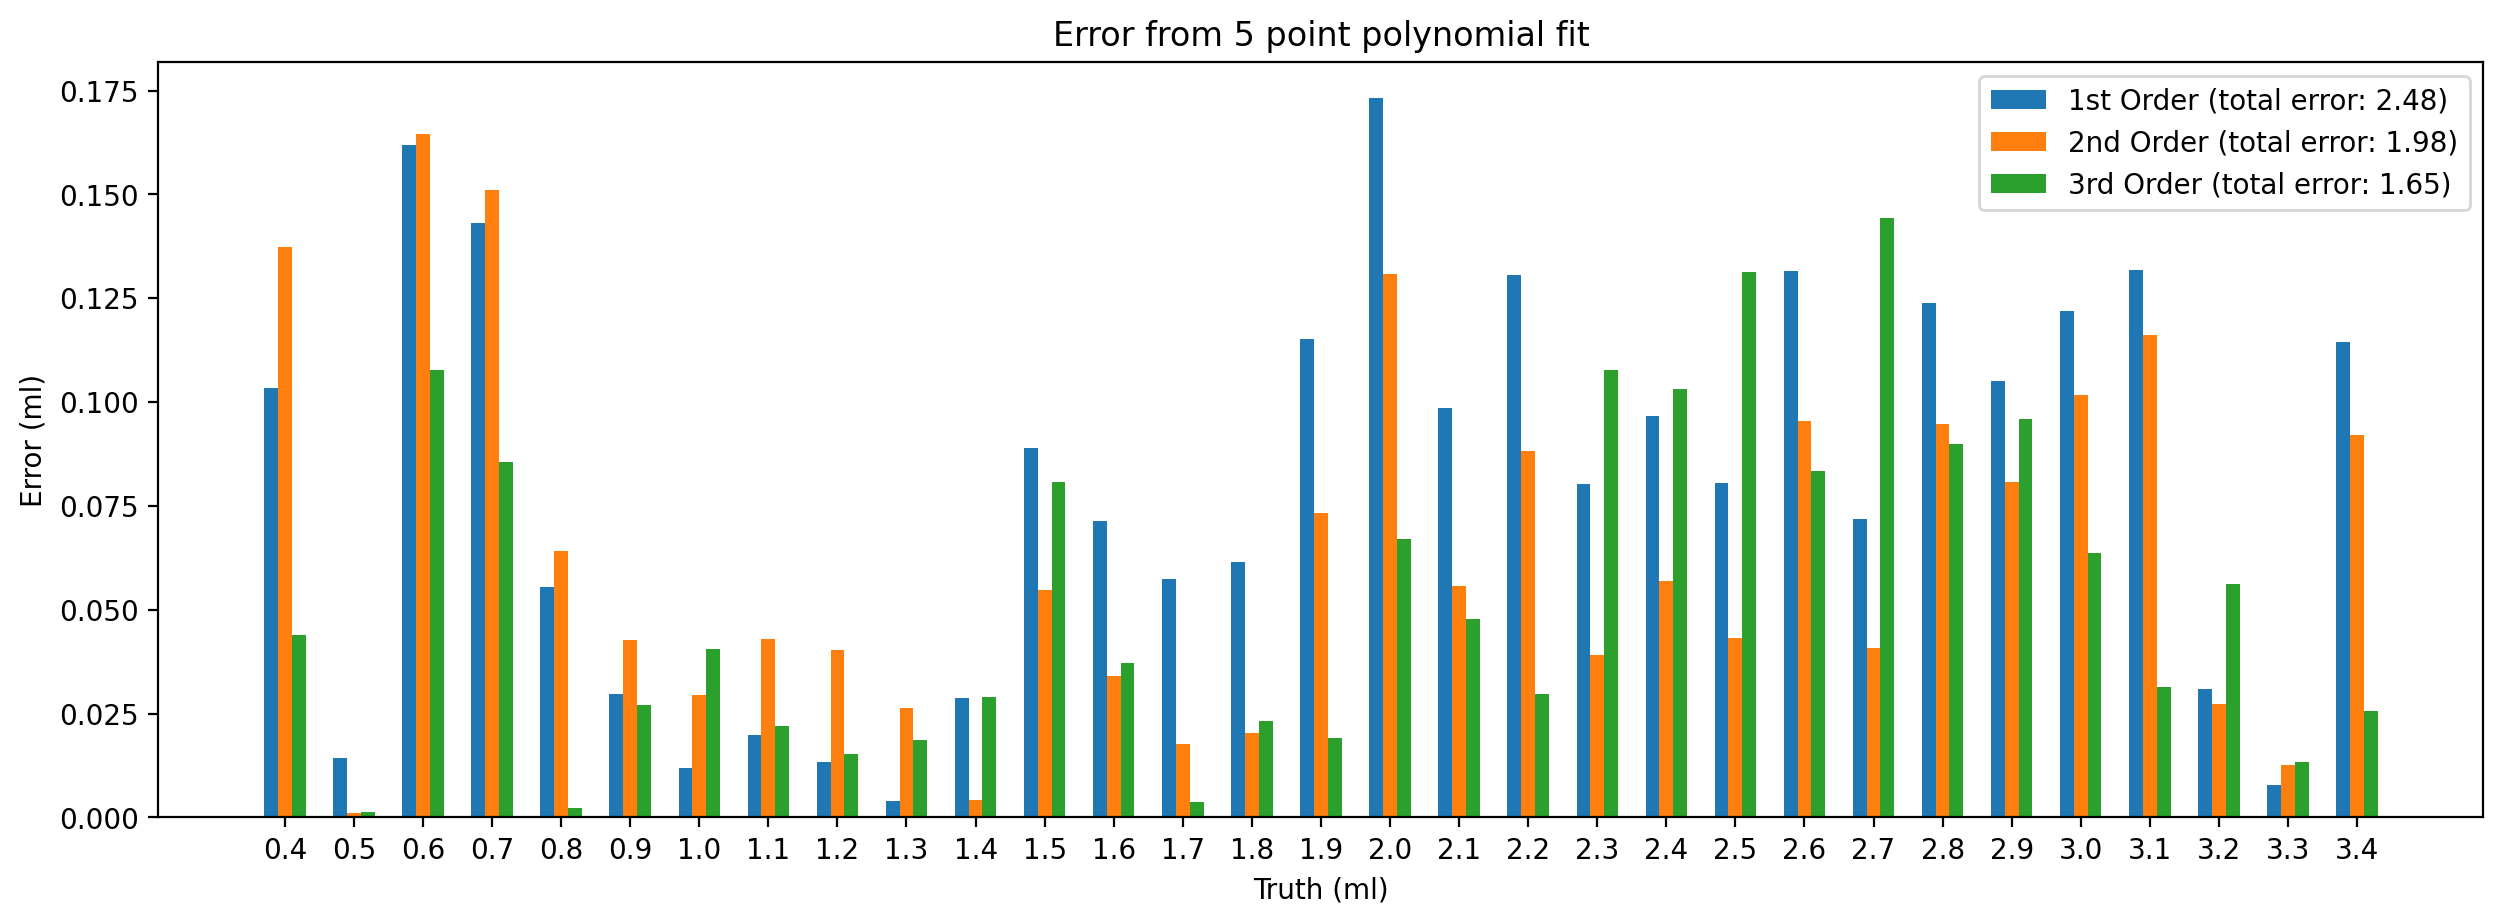

In [255]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.dpi'] = 300

frame = pd.read_csv(path)
#frame = frame.iloc[[6,11,16,21,26]]
frame = frame.iloc[[0,2,4,11,27,29,30]]
startIndex = 0
endIndex = len(frame.volume)


x=frame.volume[startIndex:endIndex]
y=frame[value+"_pb_mean"][startIndex:endIndex]
polyfits = []
for i in range(1,4):
    z_inv = np.polyfit(y, x, i)
    polyfits.append(np.poly1d(z_inv))


# fig2, ax2 = plt.subplots()
p = np.poly1d(z_inv)
frame = pd.read_csv(path)
startIndex = 0
endIndex = len(frame.volume)-2
x=frame.volume[startIndex:endIndex]
y=frame[value+"_pb_mean"][startIndex:endIndex]

error1 = abs(x - polyfits[0](y))
# ax2.plot(x,error1,'o',mfc='red',ms=4,mew=0)
error2 = abs(x - polyfits[1](y))
# ax2.plot(x,error2,'o',mfc='green',ms=4,mew=0)
error3 = abs(x - polyfits[2](y))
# ax2.plot(x,error3,'o',mfc='blue',ms=4,mew=0)
# ax2.set_ylabel('Error (ml)')
# ax2.set_xlabel('true ml')
# ax2.set_title("Error based on 5 point Poly fit")

#get total error in linear range
print(sum(error1), sum(error2), sum(error3))

index = np.arange(len(x))
bar_width = 0.2

fig3, ax3 = plt.subplots(figsize=(15,5))

summer = ax3.bar(index, error1, bar_width,
                label="1st Order (total error: "+str(round(sum(error1),2))+")")
winter = ax3.bar(index+bar_width, error2,
                 bar_width, label="2nd Order (total error: "+str(round(sum(error2),2))+")")
barf = ax3.bar(index+2*bar_width, error3,
                 bar_width, label="3rd Order (total error: "+str(round(sum(error3),2))+")")
ax3.set_xlabel('Truth (ml)')
ax3.set_ylabel('Error (ml)')
ax3.set_title('Error from 5 point polynomial fit')
ax3.set_xticks(index+bar_width)
ax3.set_xticklabels(x)
ax3.legend()
plt.savefig('Error-comparison.png')

## Plot Linear Fit Constrained to Linear Range

0.6957261471542712 0.9193426532995664 0.875958061353845


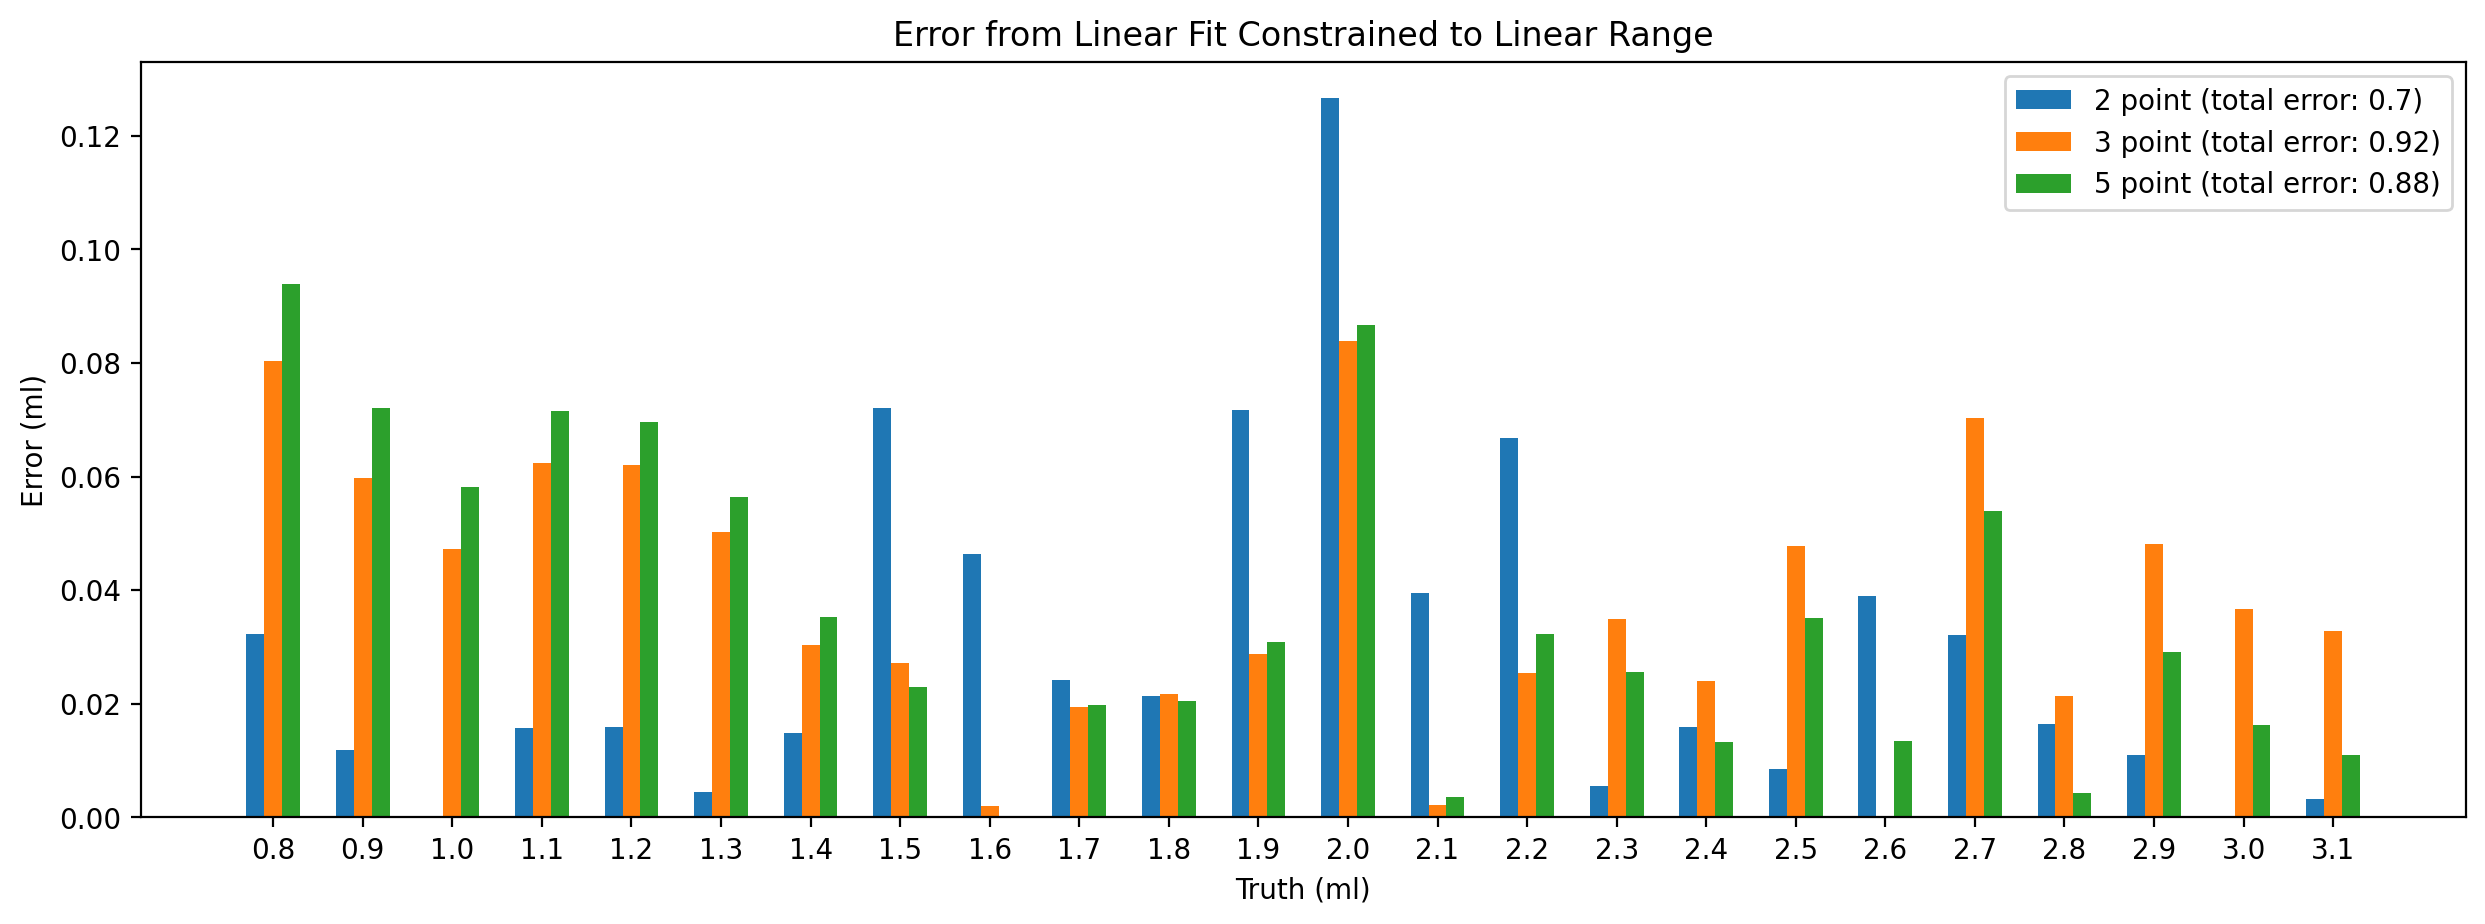

In [247]:
#cell to generate comparison plot for number of points used in polyfit

plt.rcParams['figure.dpi'] = 200
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.dpi'] = 300

polyfits = []

# for i in range(1,4):
#     z_inv = np.polyfit(y, x, i)
#     polyfits.append(np.poly1d(z_inv))


frame = pd.read_csv(path)
frame = frame.iloc[[6,26]]
startIndex = 0
endIndex = len(frame.volume) 
x=frame.volume[startIndex:endIndex]
y=frame[value+"_pb_mean"][startIndex:endIndex]
z_inv = np.polyfit(y, x, 1)
polyfits.append(np.poly1d(z_inv))

frame = pd.read_csv(path)
frame = frame.iloc[[6,16,26]]
startIndex = 0
endIndex = len(frame.volume)
x=frame.volume[startIndex:endIndex]
y=frame[value+"_pb_mean"][startIndex:endIndex]
z_inv = np.polyfit(y, x, 1)
polyfits.append(np.poly1d(z_inv))

frame = pd.read_csv(path)
frame = frame.iloc[[6,11,16,21,26]]
startIndex = 0
endIndex = len(frame.volume)
x=frame.volume[startIndex:endIndex]
y=frame[value+"_pb_mean"][startIndex:endIndex]
z_inv = np.polyfit(y, x, 1)
polyfits.append(np.poly1d(z_inv))

# fig2, ax2 = plt.subplots()
p = np.poly1d(z_inv)
frame = pd.read_csv(path)
startIndex = 4
endIndex = len(frame.volume)-5
x=frame.volume[startIndex:endIndex]
y=frame[value+"_pb_mean"][startIndex:endIndex]

error1 = abs(x - polyfits[0](y))
# ax2.plot(x,error1,'o',mfc='red',ms=4,mew=0)
error2 = abs(x - polyfits[1](y))
# ax2.plot(x,error2,'o',mfc='green',ms=4,mew=0)
error3 = abs(x - polyfits[2](y))
# ax2.plot(x,error3,'o',mfc='blue',ms=4,mew=0)
# ax2.set_ylabel('Error (ml)')
# ax2.set_xlabel('true ml')
# ax2.set_title("Error based on 5 point Poly fit")

#get total error in linear range
print(sum(error1), sum(error2), sum(error3))

index = np.arange(len(x))
bar_width = 0.2

fig3, ax3 = plt.subplots(figsize=(15,5))

summer = ax3.bar(index, error1, bar_width,
                label="2 point (total error: "+str(round(sum(error1),2))+")")
winter = ax3.bar(index+bar_width, error2,
                 bar_width, label="3 point (total error: "+str(round(sum(error2),2))+")")
barf = ax3.bar(index+2*bar_width, error3,
                 bar_width, label="5 point (total error: "+str(round(sum(error3),2))+")")
ax3.set_xlabel('Truth (ml)')
ax3.set_ylabel('Error (ml)')
ax3.set_title('Error from Linear Fit Constrained to Linear Range')
ax3.set_xticks(index+bar_width)
ax3.set_xticklabels(x)
ax3.legend()
plt.savefig('Error-comparison-linear-region.png')

## Plot close-up of meniscus inversion

    Unnamed: 0  volume   perimeter  perimeter_pb_mean  perimeter_pb_stdev  \
0            0     0.3  652.609167         652.171671            0.004482   
1            1     0.4  655.057138         654.812922            0.122315   
2            2     0.5  656.482773         656.403194            0.136372   
3            3     0.6  658.088255         657.613792            0.061905   
4            4     0.7  659.501974         659.234834            0.002532   
5            5     0.8  660.234926         659.985787            0.224257   
6            6     0.9  663.614880         663.240891            0.092801   
7            7     1.0  664.286268         664.912811            0.112045   
8            8     1.1  667.522193         667.085474            0.069637   
9            9     1.2  669.363353         669.995166            0.100157   
10          10     1.3  675.792904         676.013563            0.051684   
12          12     1.4  679.842400         680.616144            0.251765   

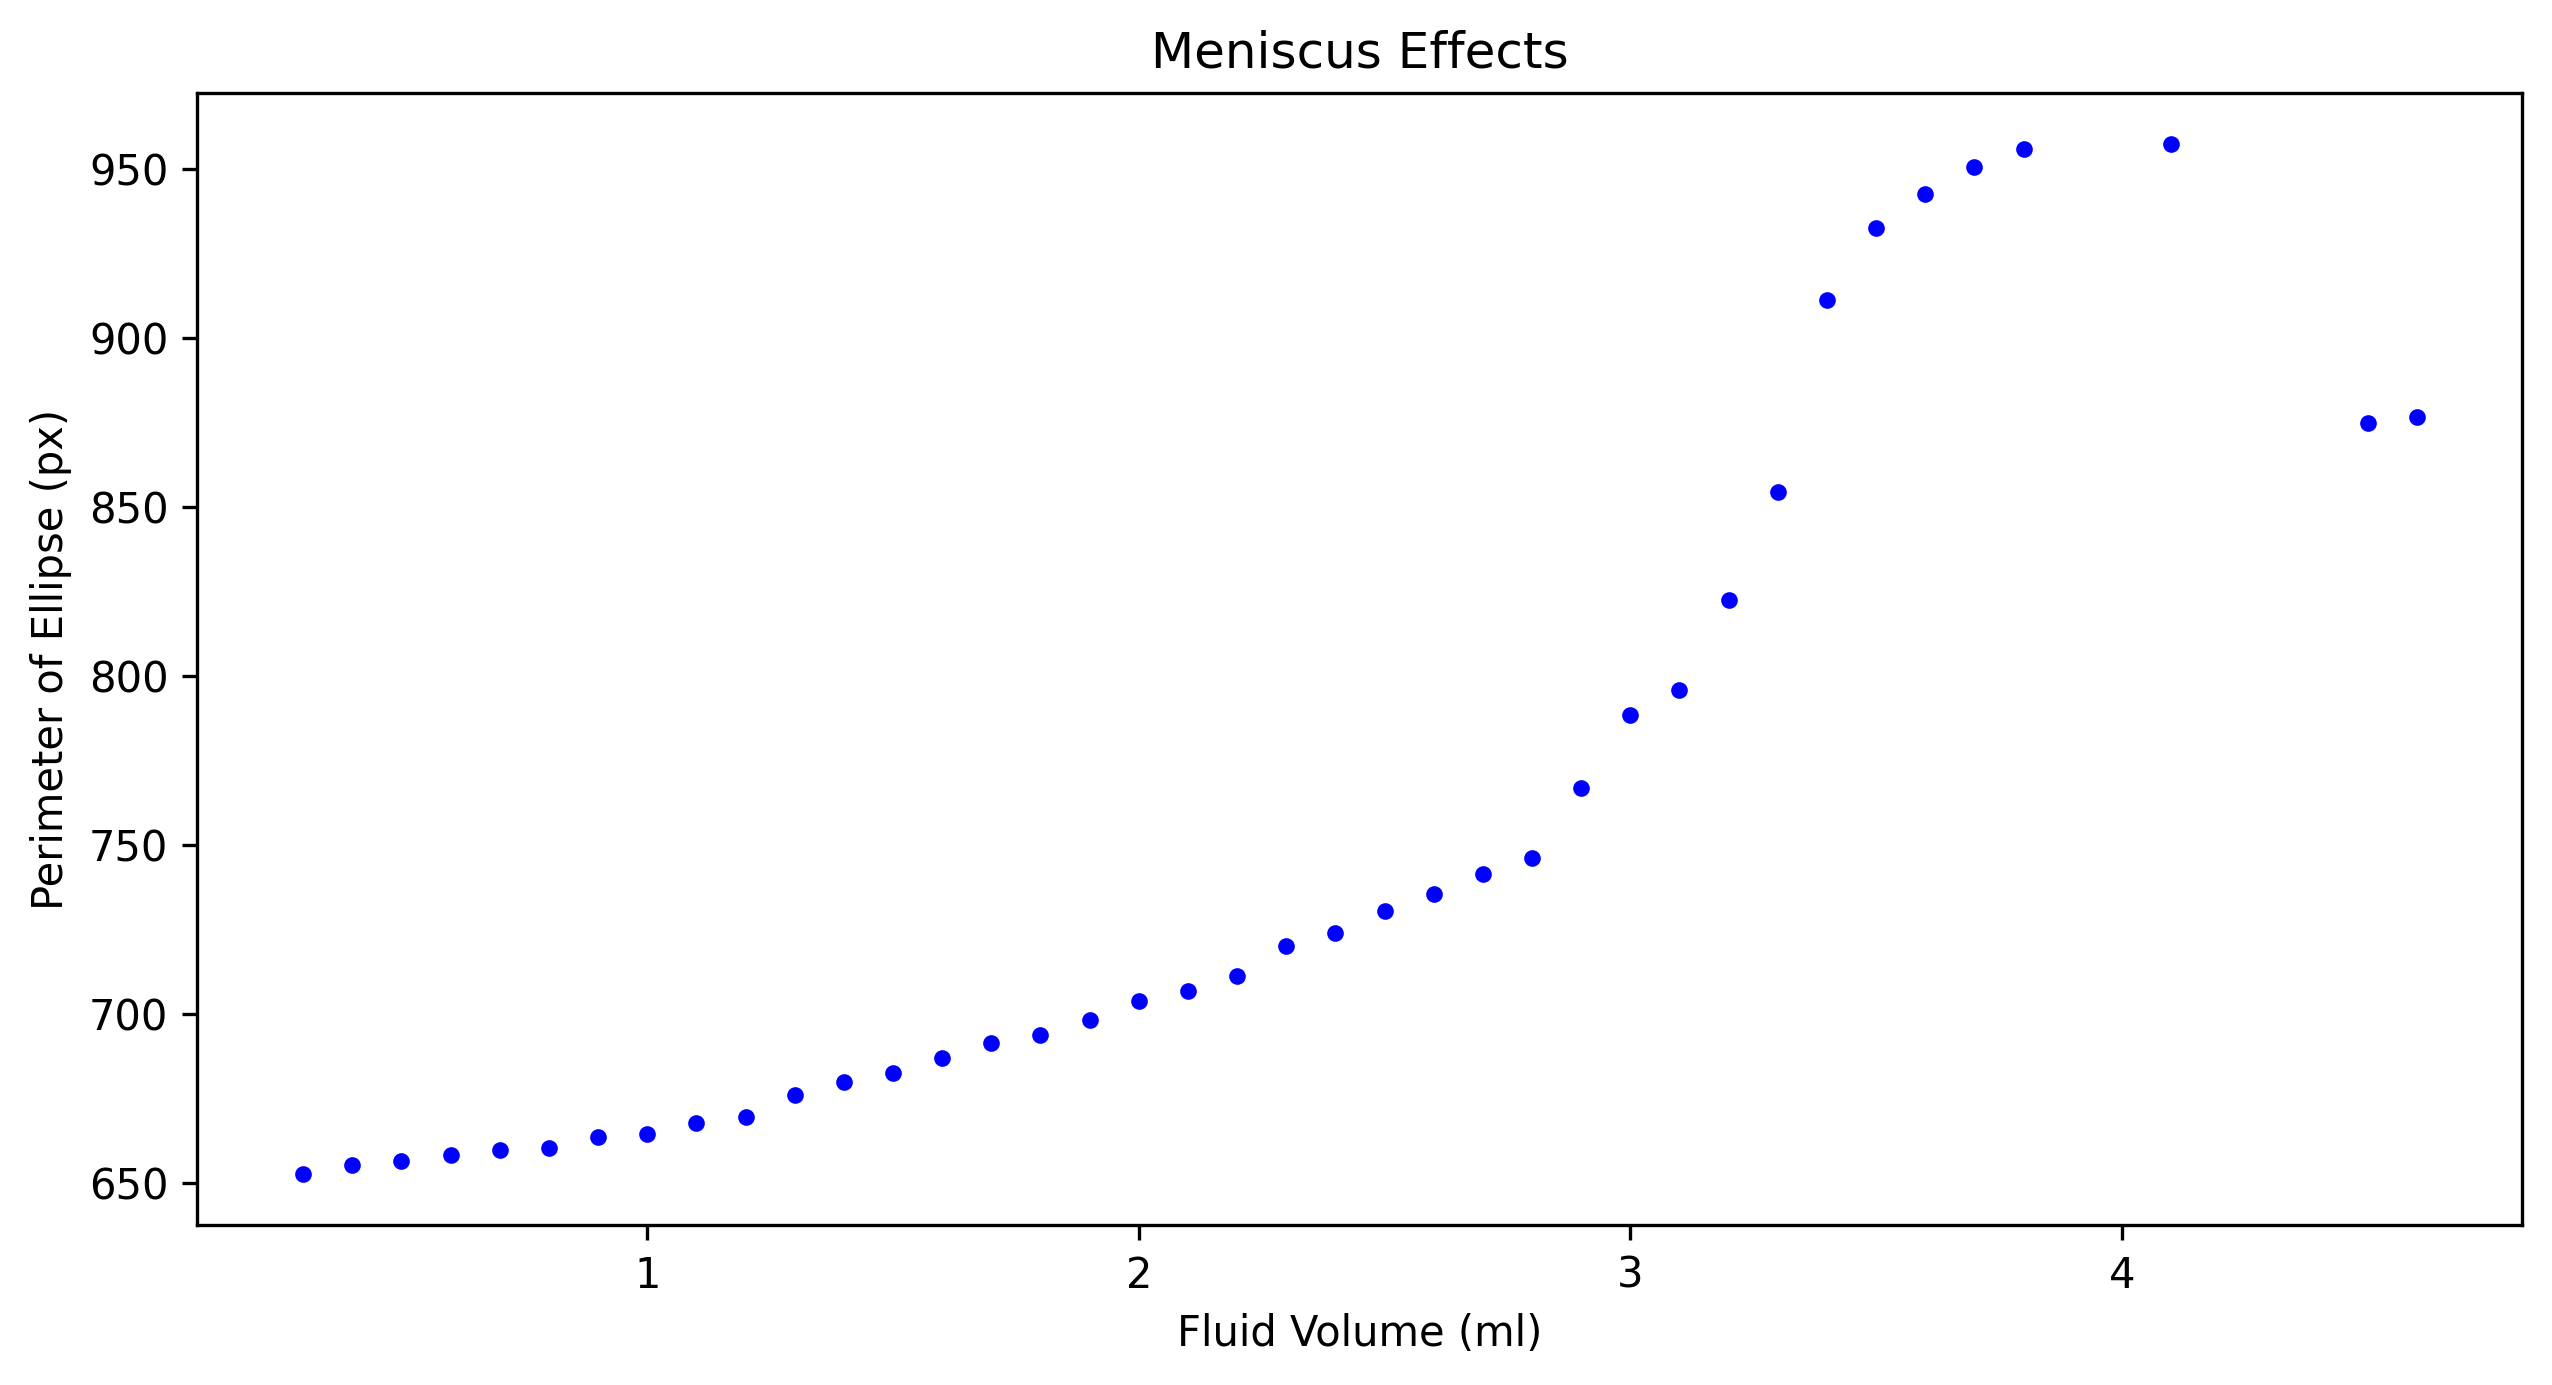

y=12.039911x^2+20.550572x+(630.344434)


In [31]:
## Plot Meniscus Inversion
# plt.plot(frame.volume, frame["perimeter_mean"], marker='s', mfc='red',
#          mec='green')#, ms=20, mew=4)

plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

fig, ax = plt.subplots(figsize=(10,5))

frame = pd.read_csv("/Users/pierre/Pictures/biology/Blob-Measuring/Level-Measurement-Experiment/stream-captures/19-August-2022T19:36:26-swirl-A1-2-100s/all_values_untouched.csv")
frame = frame.drop(11)
frame = frame.drop(37)
print(frame)
x= frame.volume
y=frame["perimeter"]
# plt.plot(x[16:],y[16:], 'ro-')
ax.plot(x, y, 'o', color='blue', ms=4, mew=0, label="Calibration Points")
# plt.plot(x,y, 'ro-')
z = np.polyfit(x, y, 2)
p = np.poly1d(z)
#plt.plot(x,p(x),'k--',linewidth=2)
# plt.axvline(x=3, ls= '--', c ='gray')
# plt.axvline(x=1, ls= '--', c ='gray')
color = 0.8
ax.set_ylabel('Perimeter of Ellipse (px)')
ax.set_xlabel('Fluid Volume (ml)')
ax.set_title("Meniscus Effects")

# ax.set_ylim(600,1000)
plt.show()
# plt.savefig('Miniscus-Inversion.png')

print( "y=%fx^2+%fx+(%f)"%(z[0],z[1],z[2]))

In [94]:
np.polyval(z_inv, 3)

6.653226007260832

In [58]:
frame2 = pd.read_csv("/Users/pierre/Pictures/biology/Blob-Measuring/Level-Measurement-Experiment/stream-captures/trash/perimeter_dataframe.csv")

In [72]:
y = frame2.iloc[1][1:-1].to_list()
x = [0.5, 1.0, 1.5, 2.0, 2.5]

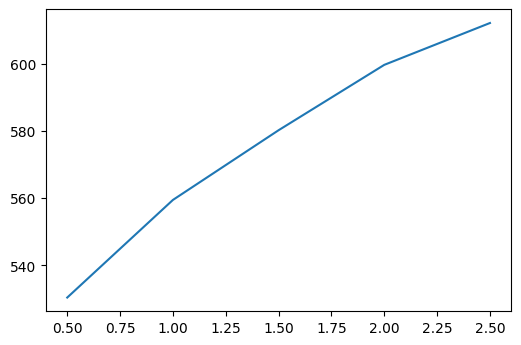

In [77]:
plt.plot(x,y)
z = np.polyfit(y, x, 1)

In [95]:
print(z_inv)

[ 4.98243115e-05 -3.85909325e-02  6.76855039e+00]


KeyError: 'key of type tuple not found and not a MultiIndex'

In [153]:
polyfits

[poly1d([  0.0209251 , -11.19647735]),
 poly1d([-1.10840814e-05,  3.49163977e-02, -1.55891098e+01]),
 poly1d([-5.67155706e-07,  1.05950224e-03, -6.36558051e-01,  1.24344396e+02])]